# Predict students' dropout and academic success

(학생들의 중도 탈락과 학업 성공 예측)

https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention



# 1. 환경설정

## 1.1 필요 라이브러리 설치 및 import

In [292]:
%pip install pandas -q
%pip install ucimlrepo -q
%pip install koreanize-matplotlib -q
%pip install shap -q
%pip install statsmodels -q
%pip install missingno -q
%pip install squarify -q


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To 

In [293]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np
import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.mosaicplot import mosaic
import squarify

import matplotlib.font_manager as fm

## 1.2 행 생략, 열 생략 방지 옵션

In [294]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## 1.3 한국어 매핑 딕셔너리

In [295]:
kor_mapping = {
    # 학생 정보 (Student Information)
    'Gender': '성별',
    'Nacionality': '국적',
    'Age at enrollment': '입학 시 나이',
    'Marital Status': '혼인 상태',
    'Application mode': '지원 방식',
    'Application order': '지원 순위',
    'Course': '전공 과정',
    'Daytime/evening attendance': '주간/야간 구분',
    'Previous qualification': '최종 학력',
    'International': '유학생 여부',
    'Displaced': '이주 여부',

    # 사회·경제적 변수(Socioeconomic)
    "Mother's qualification": '어머니 학력',
    "Father's qualification": '아버지 학력',
    "Mother's occupation": '어머니 직업',
    "Father's occupation": '아버지 직업',
    'Educational special needs': '특수 교육 필요 여부',
    'Debtor': '채무 여부',
    'Tuition fees up to date': '등록금 납부 최신 여부',
    'Scholarship holder': '장학금 수혜 여부',

    # 학업 관련 변수 (Academic performance) - 14개
    'Admission grade': '입학 성적',
    'Previous qualification (grade)': '이전 학력 성적',
    
    'Curricular units 1st sem (credited)': '1학기 이수 학점',
    'Curricular units 1st sem (enrolled)': '1학기 신청 학점',
    'Curricular units 1st sem (evaluations)': '1학기 평가 학점',
    'Curricular units 1st sem (approved)': '1학기 인정 학점',
    'Curricular units 1st sem (grade)': '1학기 평균 성적',
    'Curricular units 1st sem (without evaluations)': '1학기 미평가 학점',

    'Curricular units 2nd sem (credited)': '2학기 이수 학점',
    'Curricular units 2nd sem (enrolled)': '2학기 신청 학점',
    'Curricular units 2nd sem (evaluations)': '2학기 평가 학점',
    'Curricular units 2nd sem (approved)': '2학기 인정 학점',
    'Curricular units 2nd sem (grade)': '2학기 평균 성적',
    'Curricular units 2nd sem (without evaluations)': '2학기 미평가 학점',

    # 경제/사회 환경 변수 (Regional Socioeconomic Indicators)
    'Unemployment rate': '실업률',
    'Inflation rate': '물가상승률',
    'GDP': 'GDP',

    'Target': '학업 중단 여부'
}

In [296]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
  
# metadata 
print(predict_students_dropout_and_academic_success.metadata) 


{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

In [297]:
X = X.rename(columns=kor_mapping)
y = y.rename(columns=kor_mapping)

df = pd.concat([X, y], axis=1)

# 2. 데이터 미리 보기

## 2.1 데이터 크기 확인

In [298]:
# 데이터 크기 확인
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (4424, 36)
y shape: (4424, 1)


## 2.2 컬럼명 확인

In [299]:
print(X.columns)

Index(['혼인 상태', '지원 방식', '지원 순위', '전공 과정', '주간/야간 구분', '최종 학력', '이전 학력 성적',
       '국적', '어머니 학력', '아버지 학력', '어머니 직업', '아버지 직업', '입학 성적', '이주 여부',
       '특수 교육 필요 여부', '채무 여부', '등록금 납부 최신 여부', '성별', '장학금 수혜 여부', '입학 시 나이',
       '유학생 여부', '1학기 이수 학점', '1학기 신청 학점', '1학기 평가 학점', '1학기 인정 학점',
       '1학기 평균 성적', '1학기 미평가 학점', '2학기 이수 학점', '2학기 신청 학점', '2학기 평가 학점',
       '2학기 인정 학점', '2학기 평균 성적', '2학기 미평가 학점', '실업률', '물가상승률', 'GDP'],
      dtype='object')


In [300]:
print(y.columns)

Index(['학업 중단 여부'], dtype='object')


## 2.3 결측치 확인

In [301]:
# X에서 결측치가 있는 열만 추출
null_cols = X.columns[X.isnull().any()].tolist()

if len(null_cols) == 0:
    print("X 결측치가 있는 열 : 결측치가 있는 열이 없습니다.")
else:
    print(f"X 결측치가 있는 열 : {null_cols}")


# y에서 결측치가 있는 행 확인
null_cols = y.columns[y.isnull().any()].tolist()

if len(null_cols) == 0:
    print("y 결측치가 있는 열 : 결측치가 있는 열이 없습니다.")
else:
    print(f"y 결측치가 있는 열 : {null_cols}")

X 결측치가 있는 열 : 결측치가 있는 열이 없습니다.
y 결측치가 있는 열 : 결측치가 있는 열이 없습니다.


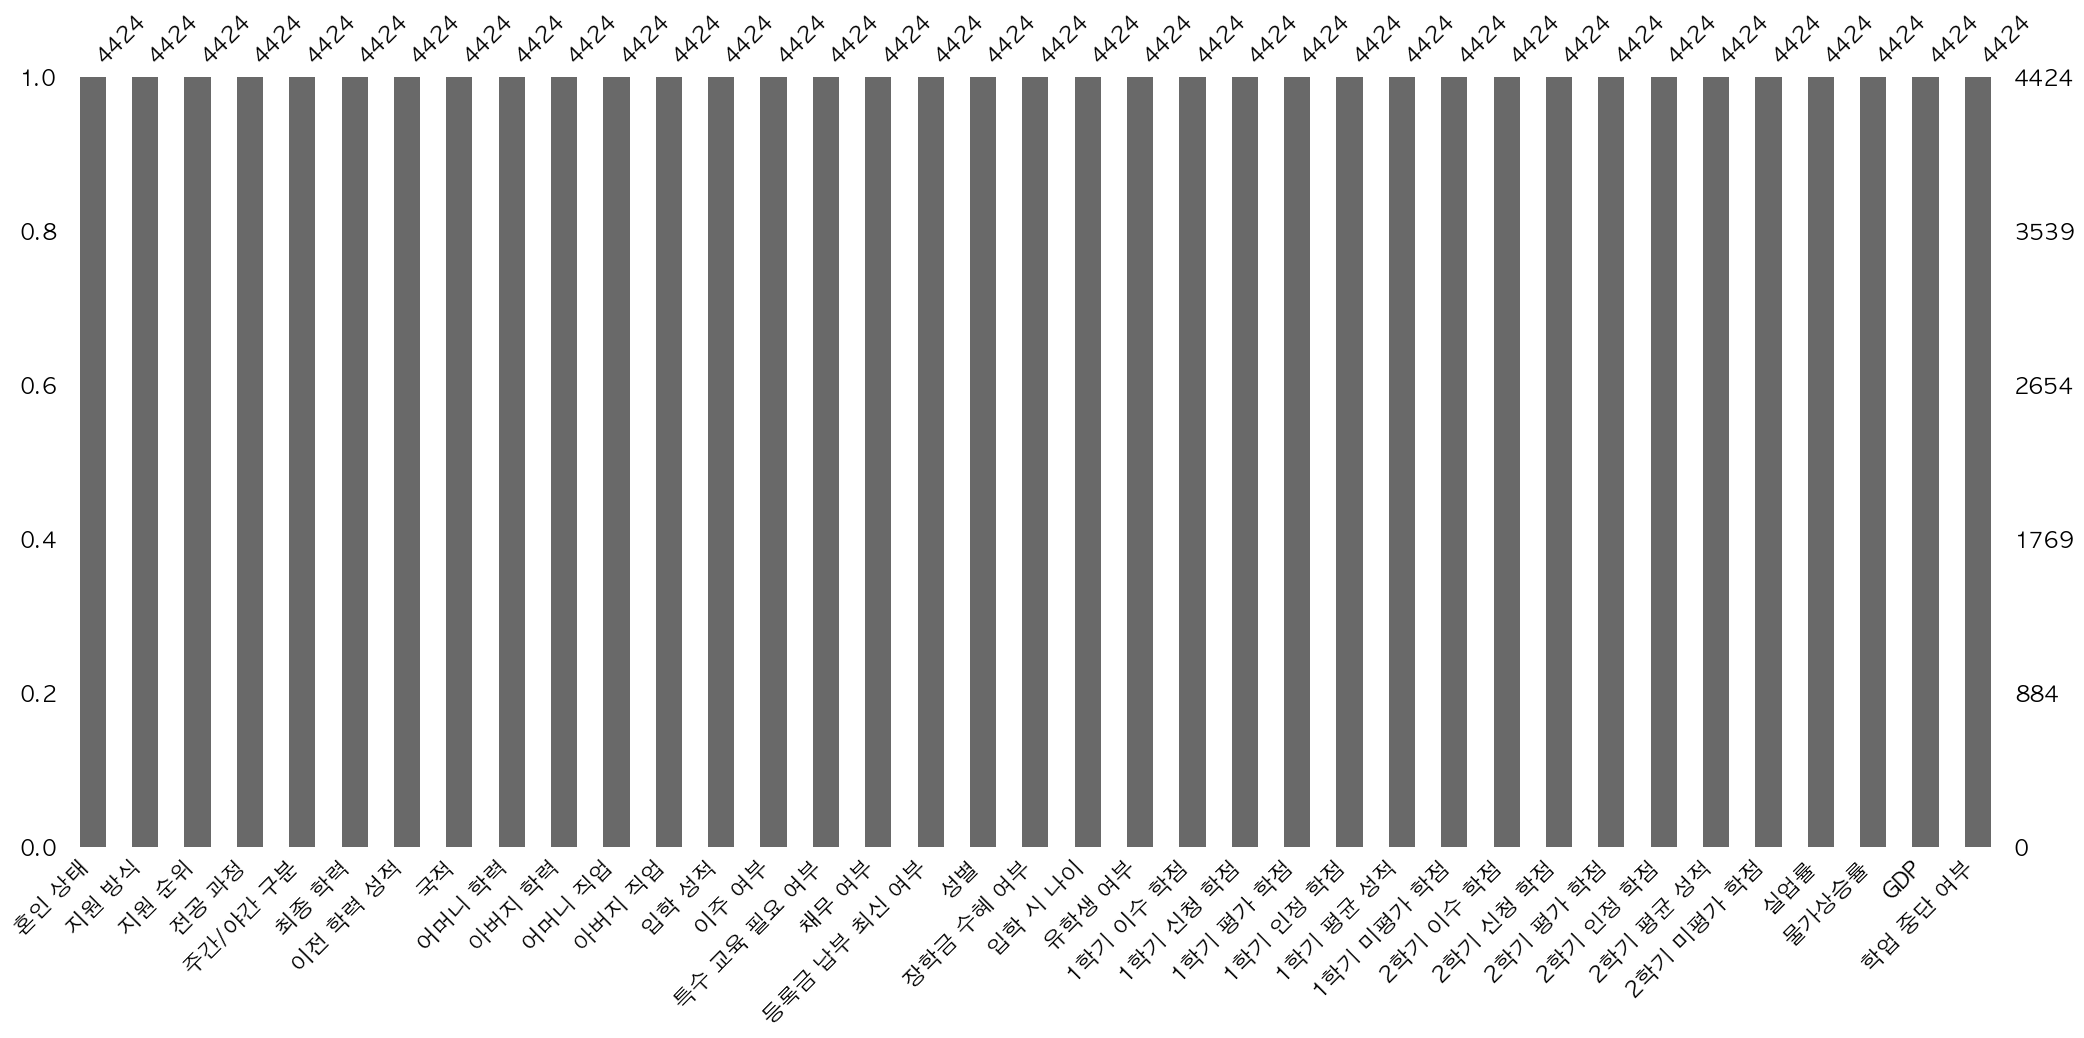

In [302]:
# 막대 그래프
msno.bar(df)
plt.show()

## 2.4 타겟(y) 값 분포 체크

학업 중단 여부 count
학업 중단 여부
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

학업 중단 여부 normalized
학업 중단 여부
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: proportion, dtype: float64


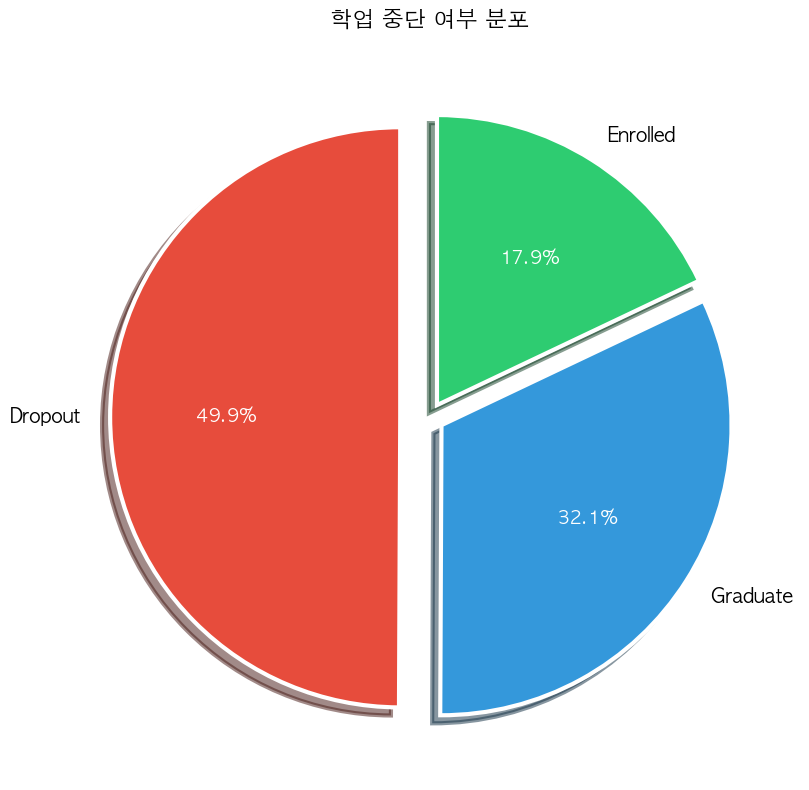

In [303]:
print("학업 중단 여부 count")
print(df['학업 중단 여부'].value_counts())
print()
print("학업 중단 여부 normalized")
print(df['학업 중단 여부'].value_counts(normalize=True))

# 파이차트 데이터 준비
counts = df['학업 중단 여부'].value_counts()
labels = ['Dropout', 'Graduate ', 'Enrolled']
sizes = counts.values
colors = ['#e74c3c', '#3498db' , "#2ecc71"]  # 파란색(유지), 빨강(중단)
explode = (0.1, 0.05, 0.05)  # 중단 부분을 약간 분리하여 강조

# 파이차트 그리기
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,  # 그림자 효과
    wedgeprops={
        'edgecolor': 'white',  # 경계선 색상
        'linewidth': 3,        # 경계선 두께
        'antialiased': True    # 부드러운 렌더링
    }
)

# 텍스트 스타일링
for text in texts:
    text.set_fontsize(14)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)
    autotext.set_fontweight('bold')

plt.title('학업 중단 여부 분포', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 2.5 df의 target 값을 dropout / non-dropout (graduate) 으로 이진화

In [304]:
# 현재 값 확인
print("변환 전 값:")
print(df["학업 중단 여부"].value_counts())

# Enrolled 제외하고 Dropout/Graduate만 남기기
df = df[df["학업 중단 여부"] != "Enrolled"].copy()

# Dropout → 1, Graduate → 0
df["학업 중단 여부"] = (df["학업 중단 여부"] == "Dropout").astype(int)

print(f"\n변환 후:")
print(f"총 데이터 개수: {len(df)}")
print(f"유니크 값: {df['학업 중단 여부'].unique()}")
print(f"\n분포:")
print(df["학업 중단 여부"].value_counts().sort_index())
print(f"\n비율:")
print(df["학업 중단 여부"].value_counts(normalize=True).sort_index())

변환 전 값:
학업 중단 여부
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

변환 후:
총 데이터 개수: 3630
유니크 값: [1 0]

분포:
학업 중단 여부
0    2209
1    1421
Name: count, dtype: int64

비율:
학업 중단 여부
0    0.60854
1    0.39146
Name: proportion, dtype: float64


학업 중단 여부 value count (binary)
학업 중단 여부
0    2209
1    1421
Name: count, dtype: int64

학업 중단 여부 value count normalized (binary)
학업 중단 여부
0    0.60854
1    0.39146
Name: proportion, dtype: float64


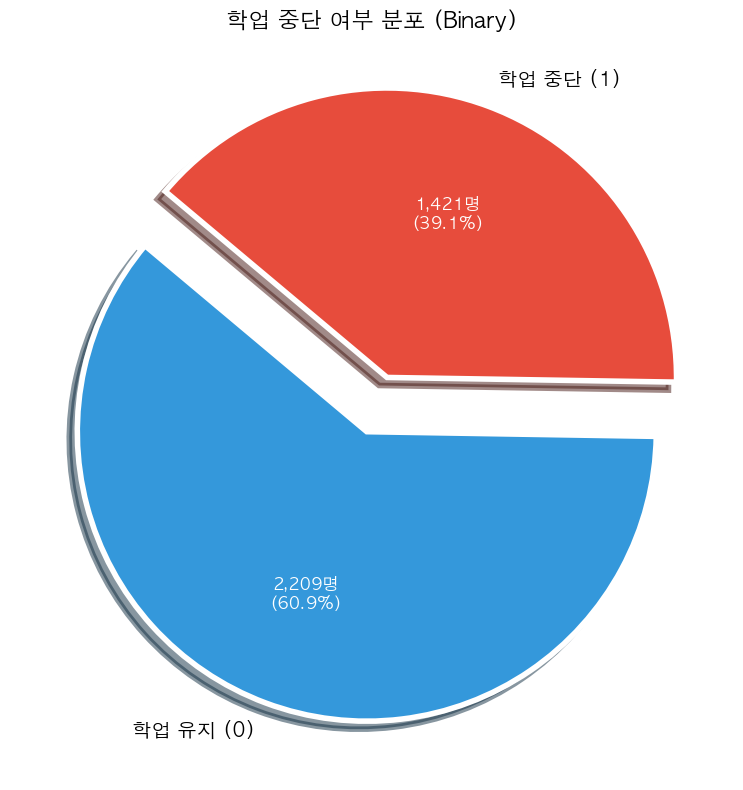

In [305]:
print("학업 중단 여부 value count (binary)")
print(df['학업 중단 여부'].value_counts())
print()
print("학업 중단 여부 value count normalized (binary)")
print(df['학업 중단 여부'].value_counts(normalize=True))

# 일반 파이차트
counts = df['학업 중단 여부'].value_counts()
labels = ['학업 유지 (0)', '학업 중단 (1)']
sizes = counts.values
colors = ['#3498db', '#e74c3c']
explode = (0.05, 0.15)

# 개수와 비율을 함께 표시하는 함수
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{val:,}명\n({pct:.1f}%)'
    return my_autopct

plt.figure(figsize=(10, 8))

wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct=make_autopct(sizes),  # 개수 + 비율
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops={
        'edgecolor': 'white',
        'linewidth': 4,
        'antialiased': True
    }
)

# 텍스트 스타일
for text in texts:
    text.set_fontsize(14)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

plt.title('학업 중단 여부 분포 (Binary)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 3. EDA

## 학생 개인 정보 EDA

### 성별에 따른 중퇴율

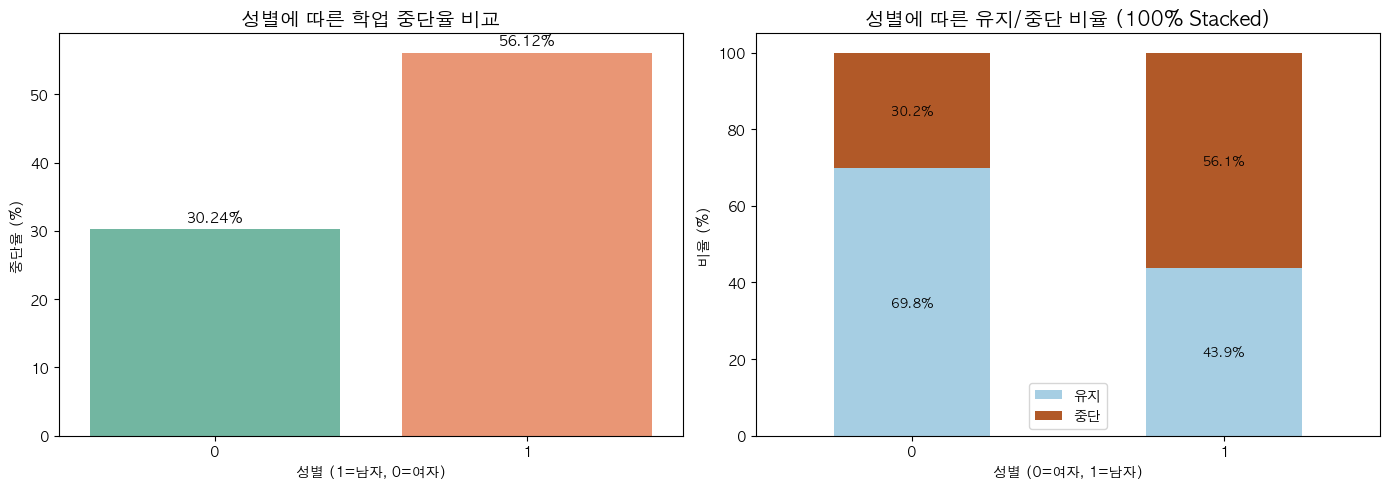

In [306]:
# 중단율 계산
rate = df.groupby('성별')['학업 중단 여부'].mean().reset_index()
rate['학업 중단율(%)'] = rate['학업 중단 여부'] * 100

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 중단율 비교
bars = sns.barplot(data=rate, x='성별', y='학업 중단율(%)', palette='Set2', ax=axes[0])
axes[0].set_title("성별에 따른 학업 중단율 비교", fontsize=14)
axes[0].set_ylabel("중단율 (%)")
axes[0].set_xlabel("성별 (1=남자, 0=여자)")

# 첫 번째 그래프에 퍼센티지 표시
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', padding=3, fontsize=10, fontweight='bold')

# 두 번째 그래프: 100% Stacked Bar
ct = pd.crosstab(df['성별'], df['학업 중단 여부'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, colormap='Paired', ax=axes[1])
axes[1].set_title("성별에 따른 유지/중단 비율 (100% Stacked)", fontsize=14)
axes[1].set_ylabel("비율 (%)")
axes[1].set_xlabel("성별 (0=여자, 1=남자)")
axes[1].legend(["유지", "중단"])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

# 두 번째 그래프(Stacked Bar)에 퍼센티지 표시
for container in axes[1].containers:
    labels = [f'{v:.1f}%' if v > 5 else '' for v in container.datavalues]  # 5% 이상만 표시
    axes[1].bar_label(container, labels=labels, label_type='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### 입학 시 나이에 따른 중퇴 여부 분포

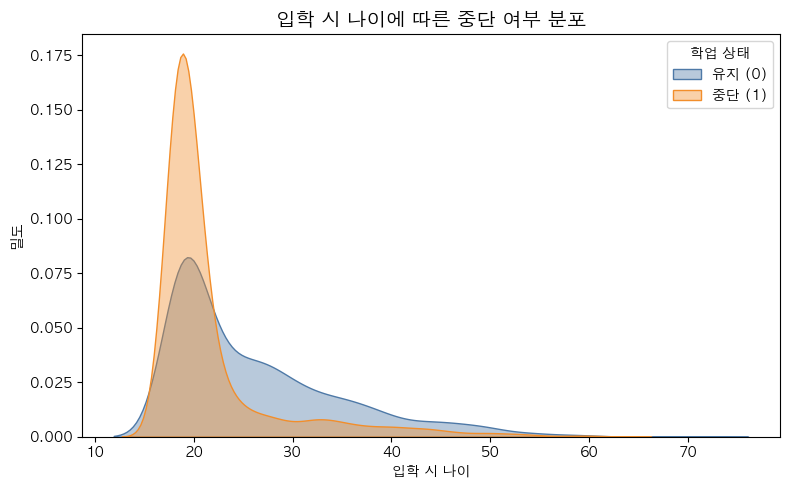

In [342]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='입학 시 나이', hue='학업 중단 여부',
            fill=True, common_norm=False, alpha=0.4,
            palette=['#F28E2B','#4E79A7'])
plt.title('입학 시 나이에 따른 중단 여부 분포', fontsize=14, fontweight='bold')
plt.xlabel('입학 시 나이')
plt.ylabel('밀도')

# 범례 수정 - 올바른 방법
legend = plt.legend(title='학업 상태', labels=['유지 (0)', '중단 (1)'])

plt.tight_layout()
plt.show()

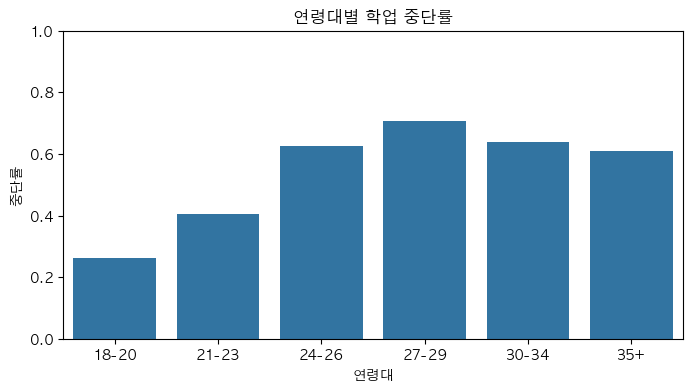

In [345]:
bins = [17, 20, 23, 26, 29, 34, 80]
labels = ["18-20", "21-23", "24-26", "27-29", "30-34", "35+"]

df["연령대"] = pd.cut(df["입학 시 나이"], bins=bins, labels=labels, right=True)

age_group_rate = df.groupby("연령대")["학업 중단 여부"].mean()

plt.figure(figsize=(8,4))
sns.barplot(x=age_group_rate.index, y=age_group_rate.values)
plt.title("연령대별 학업 중단률")
plt.ylabel("중단률")
plt.xlabel("연령대")
plt.ylim(0,1)
plt.show()

### 혼인 상태에 따른 중퇴 여부 — Countplot (hue)

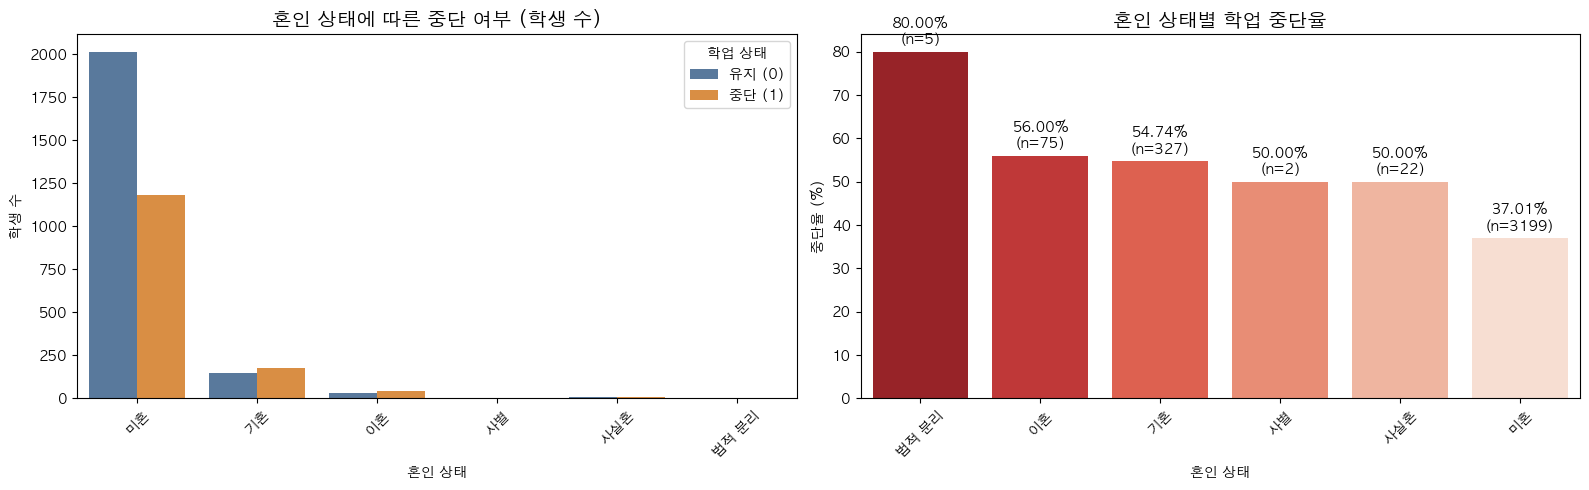

In [308]:
# 혼인 상태 매핑 (원본 데이터프레임 복사본에 적용)
marital_status_map = {
    1: '미혼',
    2: '기혼',
    3: '사별',
    4: '이혼',
    5: '사실혼',
    6: '법적 분리'
}

# 임시 컬럼 생성 (원본 데이터 보존)
df_temp = df.copy()
df_temp['혼인 상태'] = df_temp['혼인 상태'].map(marital_status_map)

# 중단율 계산
marital_rate = df_temp.groupby('혼인 상태')['학업 중단 여부'].agg(['mean', 'count']).reset_index()
marital_rate['중단율(%)'] = marital_rate['mean'] * 100
marital_rate = marital_rate.sort_values('중단율(%)', ascending=False)

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 첫 번째 그래프: 학생 수 비교
sns.countplot(data=df_temp, x='혼인 상태', hue='학업 중단 여부',
              palette=['#4E79A7', '#F28E2B'], ax=axes[0])
axes[0].set_title('혼인 상태에 따른 중단 여부 (학생 수)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('혼인 상태')
axes[0].set_ylabel('학생 수')
axes[0].tick_params(axis='x', rotation=45)

# 범례 수정
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles, labels=['유지 (0)', '중단 (1)'], title='학업 상태')

# 두 번째 그래프: 중단율 비교
sns.barplot(data=marital_rate, x='혼인 상태', y='중단율(%)', 
            palette='Reds_r', ax=axes[1])
axes[1].set_title('혼인 상태별 학업 중단율', fontsize=14, fontweight='bold')
axes[1].set_xlabel('혼인 상태')
axes[1].set_ylabel('중단율 (%)')
axes[1].tick_params(axis='x', rotation=45)

# 두 번째 그래프에 퍼센티지와 표본수 함께 표시
for i, (idx, row) in enumerate(marital_rate.iterrows()):
    axes[1].text(i, row['중단율(%)'] + 1, 
                 f"{row['중단율(%)']:.2f}%\n(n={int(row['count'])})",
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

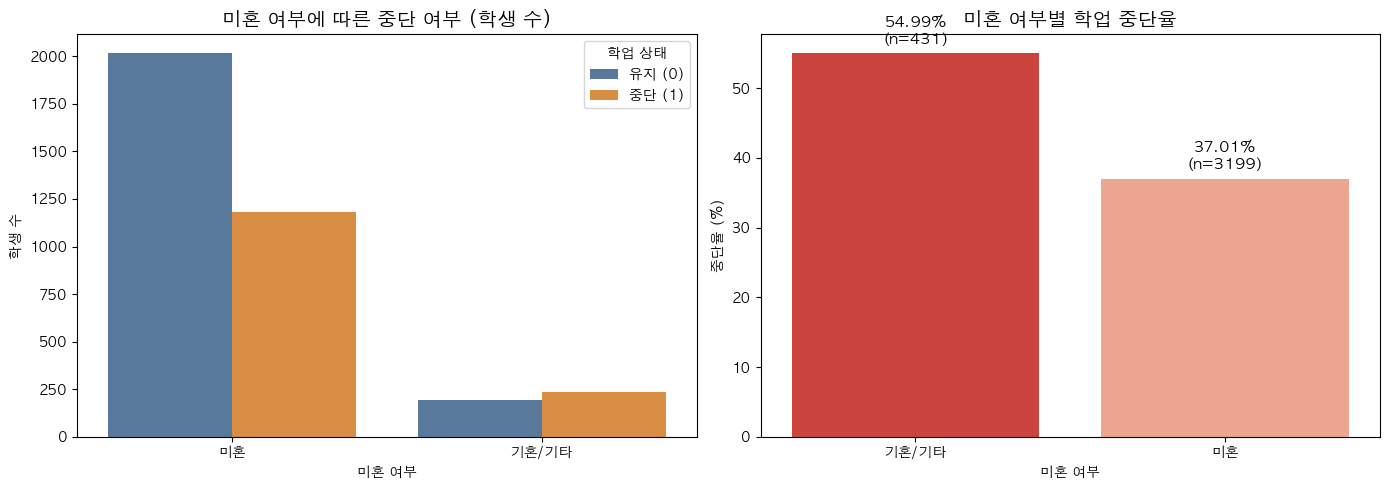

In [309]:
# 미혼 여부 컬럼 추가 (혼인 상태가 1이면 미혼, 나머지는 기혼/기타)
df['미혼 여부'] = df['혼인 상태'].apply(lambda x: '미혼' if x == 1 else '기혼/기타')

# 미혼 여부별 중단율 계산
unmarried_rate = df.groupby('미혼 여부')['학업 중단 여부'].agg(['mean', 'count']).reset_index()
unmarried_rate['중단율(%)'] = unmarried_rate['mean'] * 100
unmarried_rate = unmarried_rate.sort_values('중단율(%)', ascending=False)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 학생 수 비교
sns.countplot(data=df, x='미혼 여부', hue='학업 중단 여부',
              palette=['#4E79A7', '#F28E2B'], ax=axes[0])
axes[0].set_title('미혼 여부에 따른 중단 여부 (학생 수)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('미혼 여부')
axes[0].set_ylabel('학생 수')

# 범례 수정
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles, labels=['유지 (0)', '중단 (1)'], title='학업 상태')

# 두 번째 그래프: 중단율 비교
sns.barplot(data=unmarried_rate, x='미혼 여부', y='중단율(%)', 
            palette='Reds_r', ax=axes[1])
axes[1].set_title('미혼 여부별 학업 중단율', fontsize=14, fontweight='bold')
axes[1].set_xlabel('미혼 여부')
axes[1].set_ylabel('중단율 (%)')

# 두 번째 그래프에 퍼센티지와 표본수 표시
for i, (idx, row) in enumerate(unmarried_rate.iterrows()):
    axes[1].text(i, row['중단율(%)'] + 1, 
                 f"{row['중단율(%)']:.2f}%\n(n={int(row['count'])})",
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### 지원 순위에 따른 중퇴 여부 — Lineplot (학업 동기(motivation))

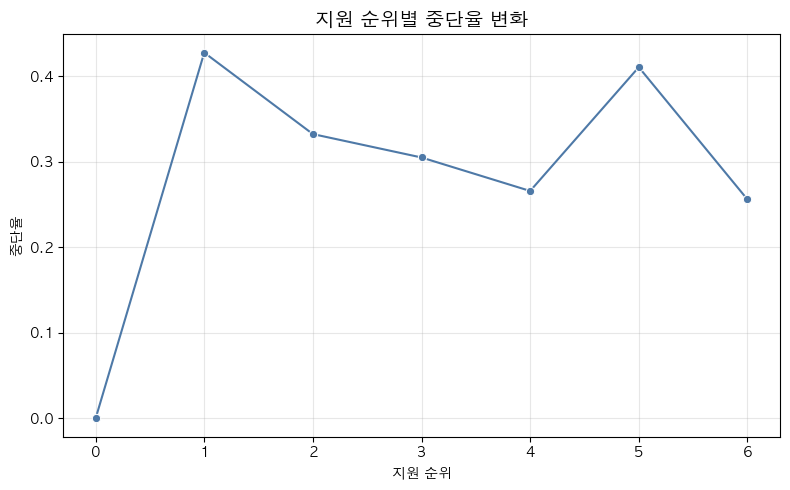

In [310]:
order_rate = (
    df.groupby('지원 순위')['학업 중단 여부']
    .mean()
    .reset_index()
    .rename(columns={'학업 중단 여부': '중단율'})
)

plt.figure(figsize=(8,5))
sns.lineplot(data=order_rate, x='지원 순위', y='중단율',
             marker='o', color='#4E79A7')
plt.title('지원 순위별 중단율 변화', fontsize=14, fontweight='bold')
plt.xlabel('지원 순위')
plt.ylabel('중단율')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 전공(Course)에 따른 중퇴율

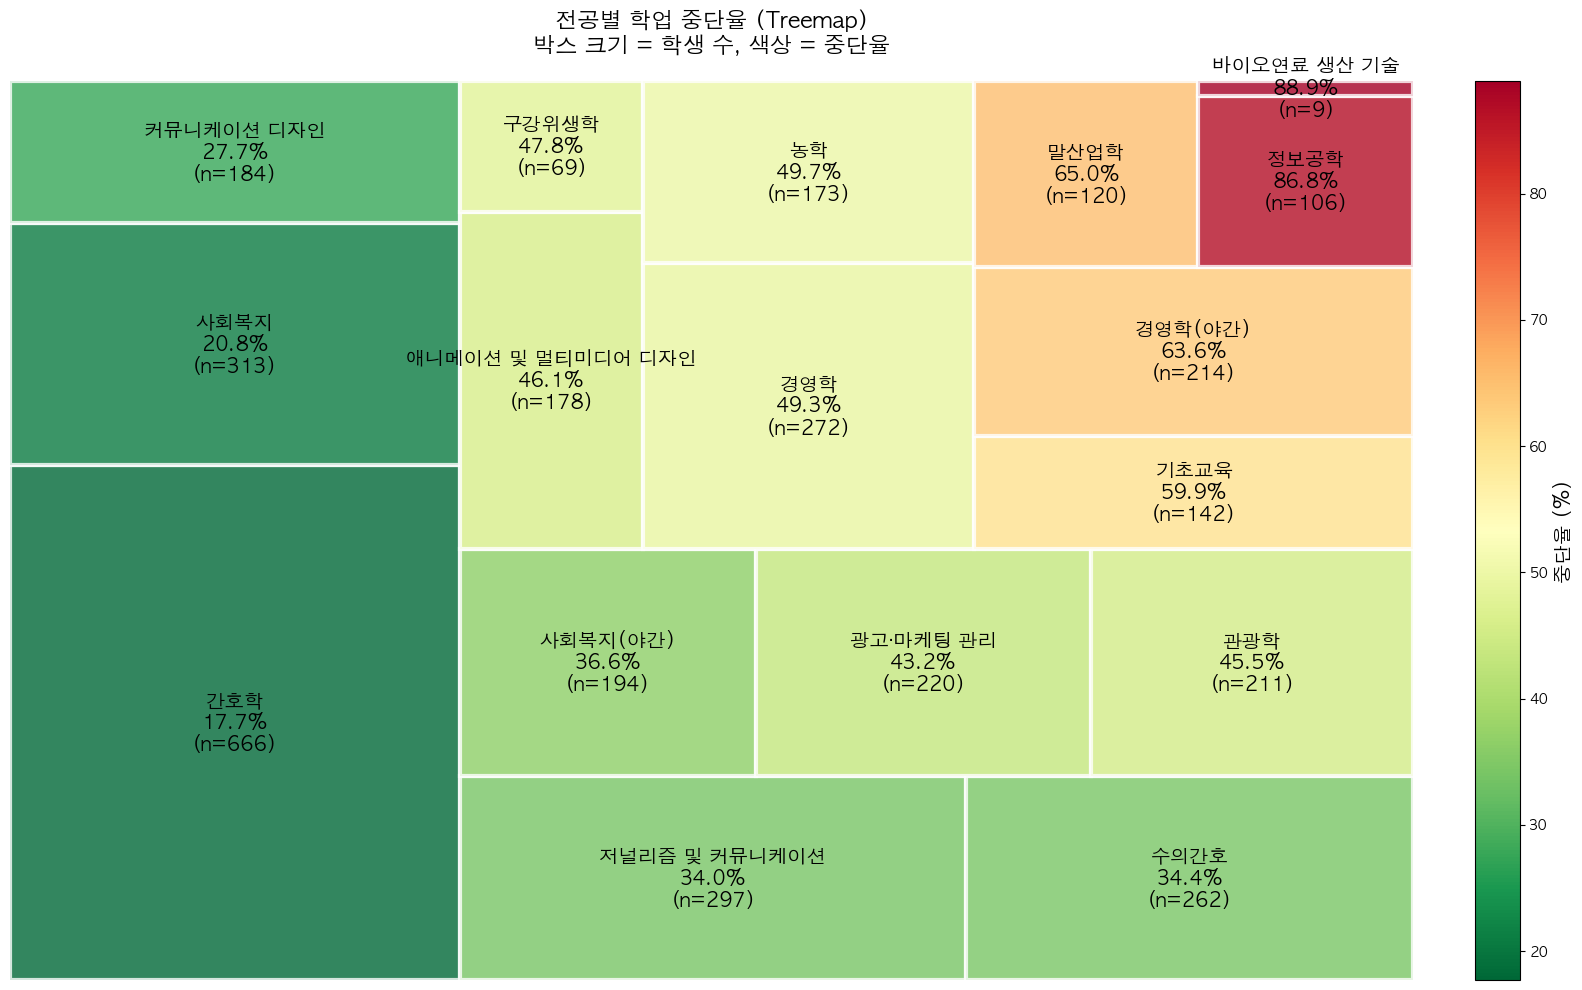

In [311]:
course_col = {
    33: "바이오연료 생산 기술",
    171: "애니메이션 및 멀티미디어 디자인",
    8014: "사회복지(야간)",
    9003: "농학",
    9070: "커뮤니케이션 디자인",
    9085: "수의간호",
    9119: "정보공학",
    9130: "말산업학",
    9147: "경영학",
    9238: "사회복지",
    9254: "관광학",
    9500: "간호학",
    9556: "구강위생학",
    9670: "광고·마케팅 관리",
    9773: "저널리즘 및 커뮤니케이션",
    9853: "기초교육",
    9991: "경영학(야간)",
}

# 전공별 중단율과 학생 수 계산
course_stats = df.groupby('전공 과정').agg({
    '학업 중단 여부': ['mean', 'count']
}).reset_index()
course_stats.columns = ['전공 과정', '중단율', '학생 수']
course_stats['전공명'] = course_stats['전공 과정'].map(course_col)
course_stats['중단율(%)'] = course_stats['중단율'] * 100
course_stats = course_stats.sort_values('중단율(%)', ascending=True)  # 오름차순 정렬

# Treemap
fig, ax = plt.subplots(figsize=(16, 10))

# 색상 정규화 (중단율 기준)
norm = plt.Normalize(vmin=course_stats['중단율(%)'].min(), 
                     vmax=course_stats['중단율(%)'].max())
colors = plt.cm.RdYlGn_r(norm(course_stats['중단율(%)']))

# Treemap 그리기
squarify.plot(sizes=course_stats['학생 수'],
              label=[f"{name}\n{rate:.1f}%\n(n={int(count)})" 
                     for name, rate, count in zip(course_stats['전공명'], 
                                                   course_stats['중단율(%)'], 
                                                   course_stats['학생 수'])],
              color=colors,
              alpha=0.8,
              text_kwargs={'fontsize':14},
              edgecolor='white',
              linewidth=3,
              ax=ax)

ax.set_title('전공별 학업 중단율 (Treemap)\n박스 크기 = 학생 수, 색상 = 중단율', 
             fontsize=16, fontweight='bold', pad=20)
ax.axis('off')

# 컬러바 추가
sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('중단율 (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 생활/상황에 따른 중퇴율

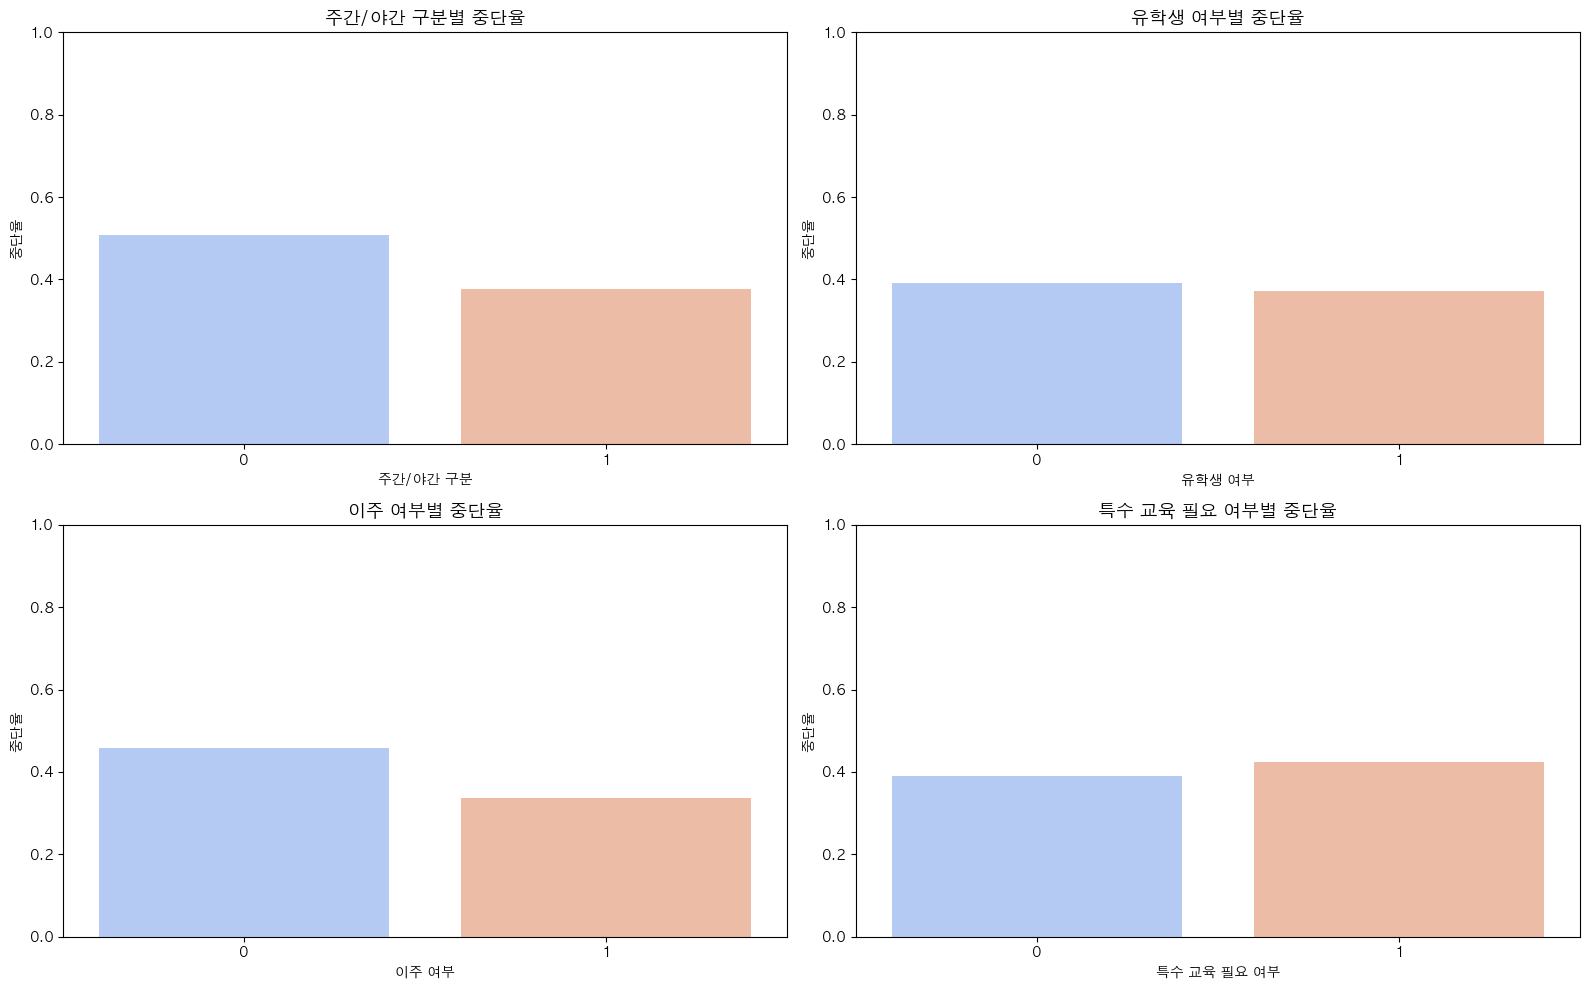

In [312]:
cols = ['주간/야간 구분', '유학생 여부', '이주 여부', '특수 교육 필요 여부']

plt.figure(figsize=(16, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    tmp = df.groupby(col)['학업 중단 여부'].mean().reset_index()
    sns.barplot(data=tmp, x=col, y='학업 중단 여부', palette='coolwarm')
    plt.title(f'{col}별 중단율', fontsize=13, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('중단율')
    plt.ylim(0, 1)
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## 가정∙경제적 EDA

### 경제적 여건과 중퇴 여부

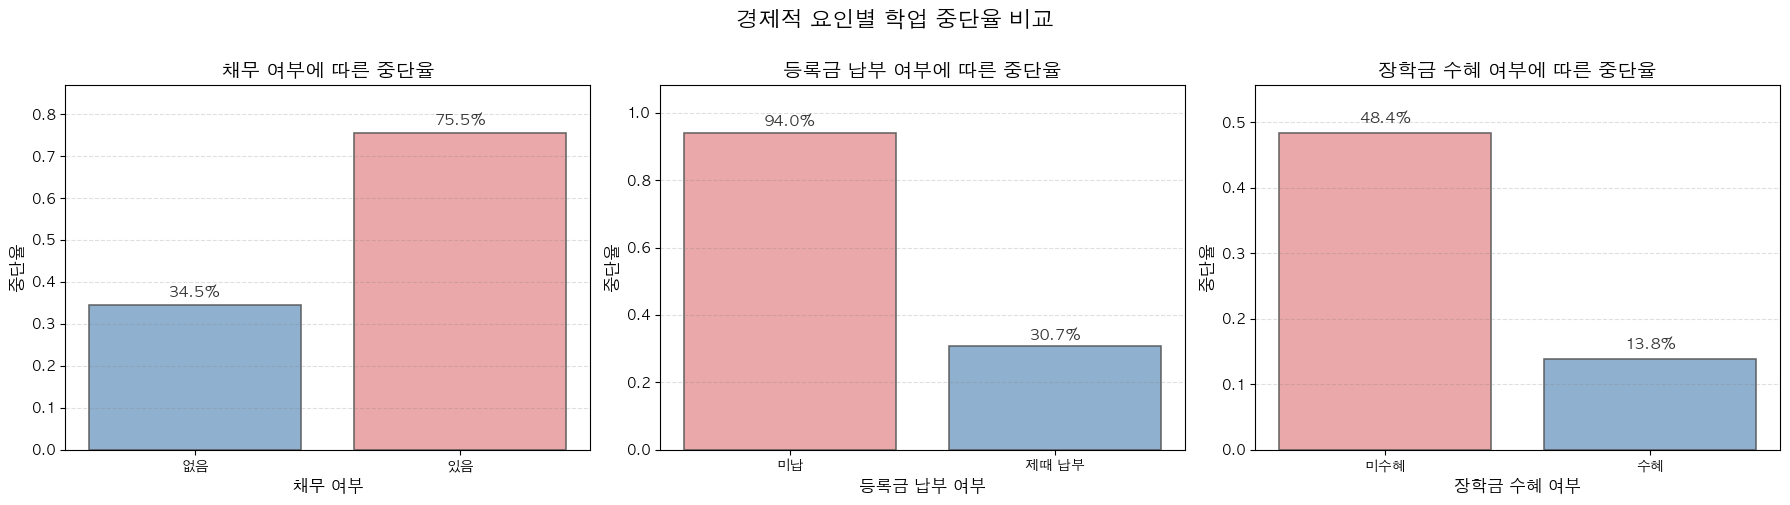

In [313]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 부드러운 색상 정의
soft_blue = '#7BA3C7'    # 부드러운 파랑 (긍정)
soft_red = '#E8999B'     # 부드러운 빨강 (부정)

# 1) 채무 여부 (0=없음[긍정]=파랑, 1=있음[부정]=빨강)
debt_data = df.groupby('채무 여부')['학업 중단 여부'].mean()
bars1 = axes[0].bar(debt_data.index, debt_data.values, 
                    color=[soft_blue, soft_red], 
                    edgecolor='#555555', linewidth=1.2, alpha=0.85)
axes[0].set_title('채무 여부에 따른 중단율', fontsize=14, fontweight='bold')
axes[0].set_xlabel('채무 여부', fontsize=12, fontweight='bold')
axes[0].set_ylabel('중단율', fontsize=12, fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['없음', '있음'])
axes[0].set_ylim(0, max(debt_data.values) * 1.15)
axes[0].grid(axis='y', alpha=0.25, linestyle='--', color='gray')
# 값 표시
for i, (idx, val) in enumerate(debt_data.items()):
    axes[0].text(i, val + 0.01, f'{val:.1%}', 
                 ha='center', va='bottom', fontsize=11, fontweight='bold', color='#333333')

# 2) 등록금 납부 여부 (0=미납[부정]=빨강, 1=납부[긍정]=파랑)
tuition_data = df.groupby('등록금 납부 최신 여부')['학업 중단 여부'].mean()
bars2 = axes[1].bar(tuition_data.index, tuition_data.values,
                    color=[soft_red, soft_blue], 
                    edgecolor='#555555', linewidth=1.2, alpha=0.85)
axes[1].set_title('등록금 납부 여부에 따른 중단율', fontsize=14, fontweight='bold')
axes[1].set_xlabel('등록금 납부 여부', fontsize=12, fontweight='bold')
axes[1].set_ylabel('중단율', fontsize=12, fontweight='bold')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['미납', '제때 납부'])
axes[1].set_ylim(0, max(tuition_data.values) * 1.15)
axes[1].grid(axis='y', alpha=0.25, linestyle='--', color='gray')
# 값 표시
for i, (idx, val) in enumerate(tuition_data.items()):
    axes[1].text(i, val + 0.01, f'{val:.1%}', 
                 ha='center', va='bottom', fontsize=11, fontweight='bold', color='#333333')

# 3) 장학금 수혜 여부 (0=미수혜[부정]=빨강, 1=수혜[긍정]=파랑)
scholarship_data = df.groupby('장학금 수혜 여부')['학업 중단 여부'].mean()
bars3 = axes[2].bar(scholarship_data.index, scholarship_data.values,
                    color=[soft_red, soft_blue], 
                    edgecolor='#555555', linewidth=1.2, alpha=0.85)
axes[2].set_title('장학금 수혜 여부에 따른 중단율', fontsize=14, fontweight='bold')
axes[2].set_xlabel('장학금 수혜 여부', fontsize=12, fontweight='bold')
axes[2].set_ylabel('중단율', fontsize=12, fontweight='bold')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['미수혜', '수혜'])
axes[2].set_ylim(0, max(scholarship_data.values) * 1.15)
axes[2].grid(axis='y', alpha=0.25, linestyle='--', color='gray')
# 값 표시
for i, (idx, val) in enumerate(scholarship_data.items()):
    axes[2].text(i, val + 0.01, f'{val:.1%}', 
                 ha='center', va='bottom', fontsize=11, fontweight='bold', color='#333333')

plt.suptitle('경제적 요인별 학업 중단율 비교', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [314]:
# 재무 관련 변수들의 위험도 분석
financial_vars = ['장학금 수혜 여부', '등록금 납부 최신 여부', '채무 여부']

risk_list = []

for var in financial_vars:
    # 각 카테고리별 중단율 계산
    grouped = df.groupby(var)['학업 중단 여부'].agg(['sum', 'count'])
    grouped['DropoutRate'] = grouped['sum'] / grouped['count']
    
    for category, row in grouped.iterrows():
        dropout_rate = row['DropoutRate']
        count = row['count']
        
        # 위험도 레벨 분류
        if dropout_rate >= 0.5:
            risk_level = 'HIGH'
        elif dropout_rate >= 0.3:
            risk_level = 'MEDIUM'
        else:
            risk_level = 'LOW'
        
        risk_list.append({
            'Variable': var,
            'Category': category,
            'Count': int(count),
            'DropoutRate': dropout_rate,
            'RiskLevel': risk_level
        })

# 위험도 분석 데이터프레임 생성
risk_df = pd.DataFrame(risk_list)
risk_df = risk_df.sort_values('DropoutRate', ascending=False).reset_index(drop=True)


# 스타일링
def color_risk_level(val):
    if val == 'HIGH':
        return 'color: red; font-weight: bold;'
    elif val == 'MEDIUM':
        return 'color: orange; font-weight: bold;'
    else:
        return 'color: green; font-weight: bold;'

def background_dropout_rate(val):
    import matplotlib.colors as mcolors
    cmap = mcolors.LinearSegmentedColormap.from_list("", ['green','yellow','red'])
    rgba = cmap(val)
    return f'background-color: rgba({int(rgba[0]*255)}, {int(rgba[1]*255)}, {int(rgba[2]*255)}, 0.6)'

styled = (
    risk_df.style
        .applymap(color_risk_level, subset=['RiskLevel'])
        .applymap(background_dropout_rate, subset=['DropoutRate'])
        .format({'DropoutRate': '{:.3f}', 'Count': '{:,.0f}'})
        .set_properties(**{'text-align': 'center'})
        .set_table_styles(
            [{'selector': 'th', 'props': [('font-weight', 'bold'),
                                          ('background-color', '#f0f0f0')]}]
        )
)

styled

,Variable,Category,Count,DropoutRate,RiskLevel
0,등록금 납부 최신 여부,0,486,0.940,HIGH
1,채무 여부,1,413,0.755,HIGH
2,장학금 수혜 여부,0,"2,661",0.484,MEDIUM
3,채무 여부,0,"3,217",0.345,MEDIUM
4,등록금 납부 최신 여부,1,"3,144",0.307,MEDIUM
5,장학금 수혜 여부,1,969,0.138,LOW


### 부모님 관련 정보와 중단율

#### 매핑

In [315]:
dad_edu_map = {
    # Level 0 — 무학/문해
    35: 0, 36: 0,  
    
    # Level 1 — 기초·중등 미완료                     
    11: 1, 26: 1, 30: 1, 37: 1, 38: 1, 
    29: 1, 10: 1, 9: 1,  

    # Level 2 — 중등(고교)   
    1: 2, 14: 2, 19: 2, 12: 2, 13: 2, 
    20: 2, 25: 2, 18: 2, 22: 2, 31: 2,
    33: 2, 27: 2,  

    # Level 3 — 고등교육                      
    2: 3, 3: 3, 6: 3, 40: 3, 39: 3, 41: 3, 42: 3, 

    # Level 4 — 석·박사 
    4: 4, 5: 4, 43: 4, 44: 4,   

    # Unknown         
    34: 9
}
df['아버지 학력 레벨'] = df['아버지 학력'].map(dad_edu_map)

edu_label_map = {
    0: "무학/문해",
    1: "기초·중등 미완료",
    2: "중등(고교)",
    3: "고등교육",
    4: "석·박사",
    9: "정보 없음"
}

df['아버지 학력'] = df['아버지 학력 레벨'].map(edu_label_map)
df['아버지 학력'].unique()

array(['중등(고교)', '고등교육', '기초·중등 미완료', '석·박사', '정보 없음', '무학/문해'],
      dtype=object)

In [316]:
mom_edu_map = {
    # Level 0
    35: 0, 36: 0,

    # Level 1 — 기초·중등 미완료
    11: 1, 26: 1, 30: 1, 37: 1, 38: 1,
    29: 1, 10: 1, 9: 1,

    # Level 2 — 중등(고교)
    1: 2, 14: 2, 19: 2,
    18: 2, 22: 2, 27: 2,
    12: 2, 

    # Level 3 — 고등교육
    2: 3, 3: 3, 6: 3,
    39: 3, 40: 3, 41: 3, 42: 3,

    # Level 4 — 석·박사
    4: 4, 5: 4, 43: 4, 44: 4,

    # Unknown
    34: 9
}

df['어머니 학력 레벨'] = df['어머니 학력'].map(mom_edu_map)
df['어머니 학력'] = df['어머니 학력 레벨'].map(edu_label_map)
df['어머니 학력'].unique()

array(['중등(고교)', '기초·중등 미완료', '고등교육', '정보 없음', '석·박사', '무학/문해'],
      dtype=object)

In [317]:
mom_job_map_label = {
    # 0 — 학생
    0: '학생',

    # 1 — 관리자·임원·고위공무원
    1: '관리자/임원',

    # 2 — 전문직 (의료·교사·ICT 등 포함)
    2: '전문직', 122: '전문직', 123: '전문직', 125: '전문직',

    # 3 — 중급 전문·기술직 (준전문가, 기술직)
    3: '중급 전문/기술직', 131: '중급 전문/기술직',
    132: '중급 전문/기술직', 134: '중급 전문/기술직',

    # 4 — 사무·행정직
    4: '사무/행정직', 141: '사무/행정직',
    143: '사무/행정직', 144: '사무/행정직',

    # 5 — 서비스·판매·돌봄직
    5: '서비스/판매/돌봄', 151: '서비스/판매/돌봄',
    152: '서비스/판매/돌봄', 153: '서비스/판매/돌봄',

    # 6 — 농림어업
    6: '농림어업',

    # 7 — 산업·건설·생산·기계직
    7: '산업/건설/생산직', 8: '산업/건설/생산직',
    171: '산업/건설/생산직', 173: '산업/건설/생산직',
    175: '산업/건설/생산직', 181: '산업/건설/생산직',
    182: '산업/건설/생산직', 183: '산업/건설/생산직',
    192: '산업/건설/생산직', 193: '산업/건설/생산직',
    194: '산업/건설/생산직',

    # 8 — 비숙련 노동자
    9: '비숙련 노동자', 191: '비숙련 노동자',

    # 9 — 군 관련 직종 (별도)
    10: '군 관련 직종', 101: '군 관련 직종',
    102: '군 관련 직종', 103: '군 관련 직종',

    # 기타/무응답
    90: '기타',  
    99: '무응답',
}

df['어머니 직업'] = df['어머니 직업'].map(mom_job_map_label)

In [318]:
dad_job_map_label = {

    # 0, 90, 99 — 서로 다른 상태
    0: '학생',
    90: '기타',
    99: '무응답',

    # 1 — 관리자·임원·고위 공무원
    1: '관리자/임원', 112: '관리자/임원', 114: '관리자/임원',

    # 2 — 전문직(의료, 교사, ICT, 금융 전문가 포함)
    2: '전문직', 121: '전문직', 122: '전문직', 
    123: '전문직', 124: '전문직',

    # 3 — 중급 전문/기술직(준전문가)
    3: '중급 전문/기술직', 131: '중급 전문/기술직', 
    132: '중급 전문/기술직', 134: '중급 전문/기술직',
    135: '중급 전문/기술직',

    # 4 — 사무/행정 직군
    4: '사무/행정직', 141: '사무/행정직', 
    143: '사무/행정직', 144: '사무/행정직',

    # 5 — 서비스·판매·돌봄·보안
    5: '서비스/판매/돌봄/보안', 151: '서비스/판매/돌봄/보안',
    152: '서비스/판매/돌봄/보안', 153: '서비스/판매/돌봄/보안',
    154: '서비스/판매/돌봄/보안', 195: '서비스/판매/돌봄/보안',

    # 6 — 농림어업
    6: '농림어업', 161: '농림어업', 163: '농림어업',

    # 7 — 산업·건설·생산 직군(블루칼라)
    7: '산업/건설/생산직', 8: '산업/건설/생산직',
    171: '산업/건설/생산직', 172: '산업/건설/생산직',
    174: '산업/건설/생산직', 175: '산업/건설/생산직',
    181: '산업/건설/생산직', 182: '산업/건설/생산직', 
    183: '산업/건설/생산직', 193: '산업/건설/생산직',
    194: '산업/건설/생산직',

    # 8 — 비숙련 노동자
    9: '비숙련 노동자', 
    191: '비숙련 노동자',

    # 9 — 군 관련 직종 (독립)
    10: '군 관련 직종', 
    101: '군 관련 직종',
    102: '군 관련 직종',
    103: '군 관련 직종'
}

df['아버지 직업'] = df['아버지 직업'].map(dad_job_map_label)

#### EDA

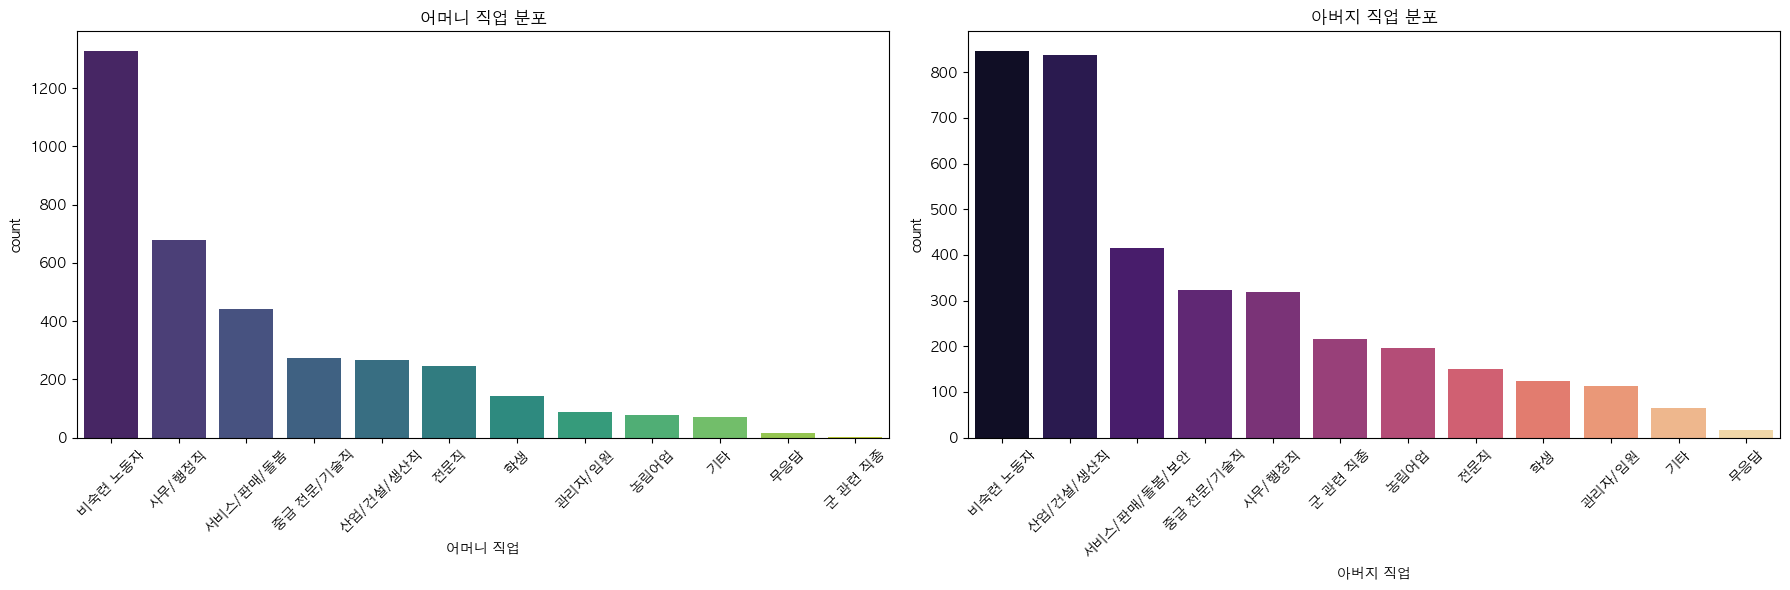

In [319]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(
    data=df, 
    x='어머니 직업', 
    order=df['어머니 직업'].value_counts().index,
    ax=axes[0],
    palette='viridis'
)
axes[0].set_title('어머니 직업 분포')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(
    data=df, 
    x='아버지 직업', 
    order=df['아버지 직업'].value_counts().index,
    ax=axes[1],
    palette='magma'
)
axes[1].set_title('아버지 직업 분포')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

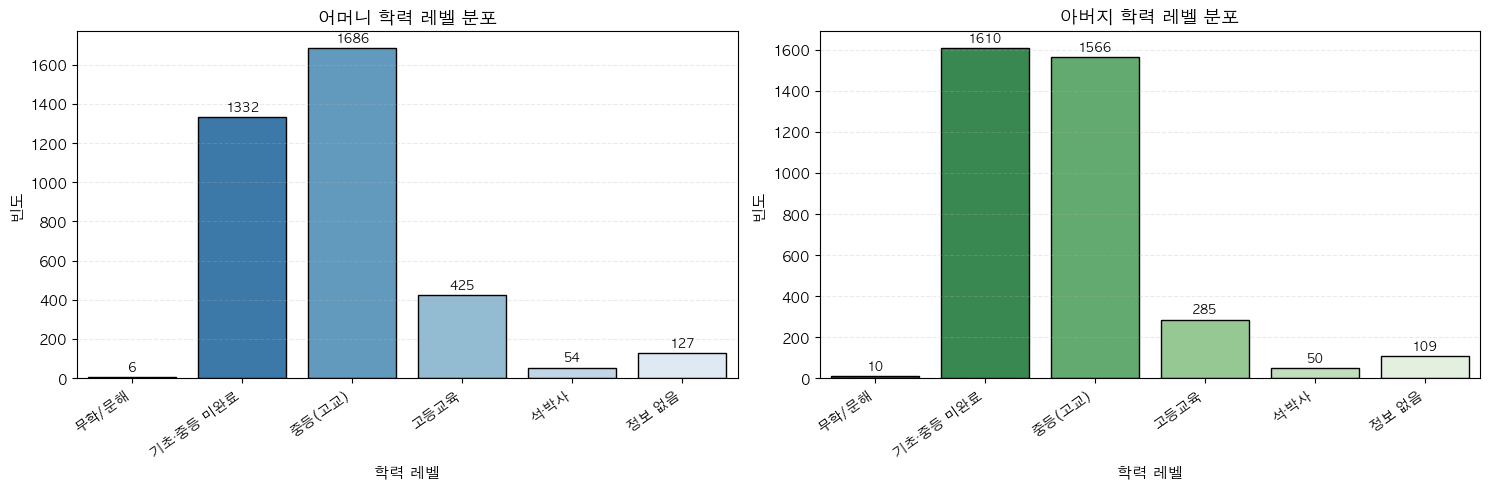

In [320]:
# 정렬 기준
education_order = [
    "무학/문해",
    "기초·중등 미완료",
    "중등(고교)",
    "고등교육",
    "석·박사",
    "정보 없음"
]

# 그래프 설정
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 라벨/칼럼명
cols = ["어머니 학력", "아버지 학력"]
titles = ["어머니 학력 레벨 분포", "아버지 학력 레벨 분포"]
palettes = [sns.color_palette("Blues_r", 6),
            sns.color_palette("Greens_r", 6)]

for ax, col, title, pal in zip(axes, cols, titles, palettes):

    sns.countplot(
        data=df,
        x=col,
        order=education_order,
        palette=pal,
        edgecolor='black',
        linewidth=1,
        ax=ax
    )

    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_xlabel("학력 레벨", fontsize=11)
    ax.set_ylabel("빈도", fontsize=11)

    # X축 라벨 회전
    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')

    # Y축 grid
    ax.grid(axis='y', alpha=0.25, linestyle='--')

    # 막대 위에 값 표시
    for container in ax.containers:
        try:
            ax.bar_label(container, fontsize=9, padding=3)
        except:
            pass

plt.tight_layout()
plt.show()

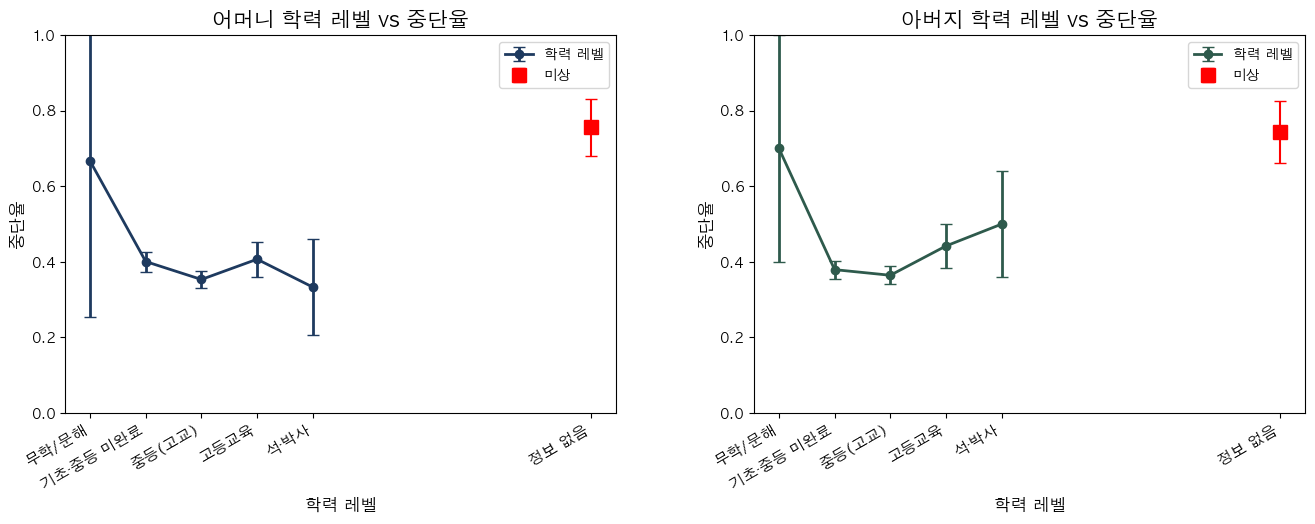

In [321]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for ax, col, color, title in zip(
    axes,
    ['어머니 학력 레벨', '아버지 학력 레벨'],
    ['#1E3A5F', '#2E5A4C'],
    ['어머니 학력 레벨 vs 중단율', '아버지 학력 레벨 vs 중단율']
):

    dropout = df.groupby(col)['학업 중단 여부'].agg(['mean', 'sem'])

    available_levels = sorted(dropout.index.tolist())

    known = dropout.loc[[lvl for lvl in [0,1,2,3,4] if lvl in available_levels]]
    ax.errorbar(
        known.index,
        known['mean'],
        yerr=1.96 * known['sem'],
        marker='o',
        color=color,
        linewidth=2,
        capsize=4,
        label='학력 레벨'
    )

    if 9 in available_levels:
        unknown = dropout.loc[9]
        ax.errorbar(
            9,
            unknown['mean'],
            yerr=1.96 * unknown['sem'],
            marker='s',
            linestyle='none',
            color='red',
            markersize=10,
            capsize=4,
            label='미상'
        )

    ax.set_xticks(available_levels)
    ax.set_xticklabels(
        [edu_label_map[l] for l in available_levels],
        fontsize=11,
        rotation=30,          # ★ 라벨 회전으로 겹침 해결
        ha='right'            # ★ 오른쪽 정렬 → 더 깔끔
    )

    ax.set_ylim(0, 1)
    ax.set_xlabel("학력 레벨", fontsize=12)
    ax.set_ylabel("중단율", fontsize=12)
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.legend()

plt.subplots_adjust(bottom=0.25, wspace=0.25)  # ★ 여백 확보
plt.show()

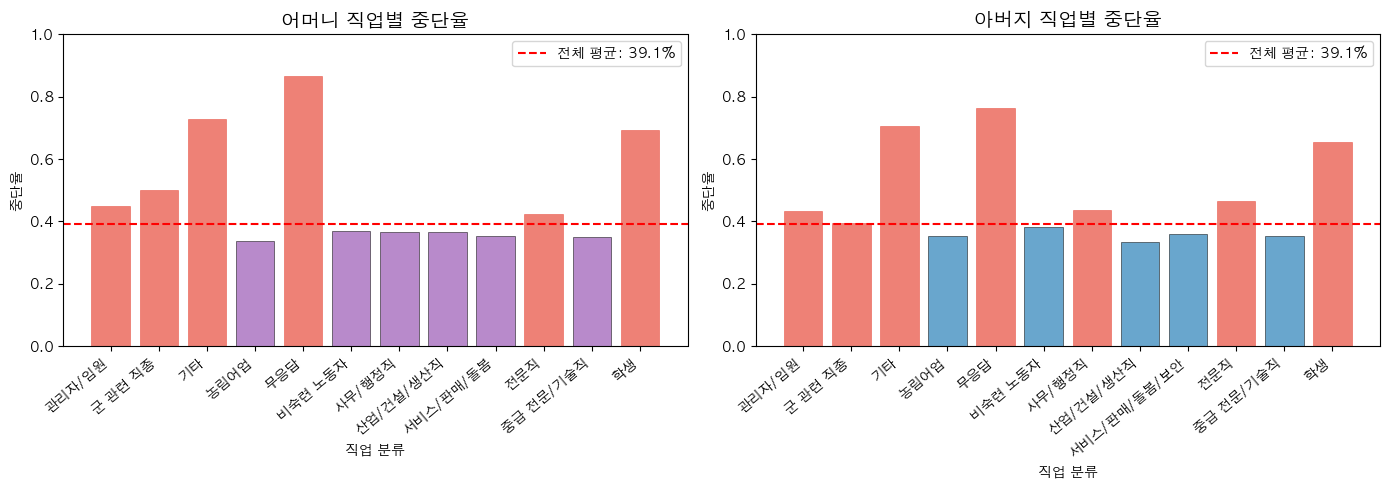

In [322]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

mother_color = '#9B59B6'   # 어머니: 보라톤
father_color = '#2980B9'   # 아버지: 블루톤

for ax, col, color, title in zip(
    axes,
    ['어머니 직업', '아버지 직업'],
    [mother_color, father_color],
    ['어머니 직업별 중단율', '아버지 직업별 중단율']
):
    
    dropout = df.groupby(col)['학업 중단 여부'].mean().sort_index()

    x = np.arange(len(dropout))
    bars = ax.bar(
        x, dropout.values,
        color=color,
        alpha=0.7,
        edgecolor='black',
        linewidth=0.5
    )

    mean_rate = df['학업 중단 여부'].mean()

    # 평균보다 높으면 강조 색 (빨간색)
    for bar, rate in zip(bars, dropout.values):
        if rate > mean_rate:
            bar.set_color('#E74C3C')

    ax.axhline(
        mean_rate, 
        color='red', 
        linestyle='--', 
        linewidth=1.5,
        label=f'전체 평균: {mean_rate*100:.1f}%'
    )

    # 🔥 라벨 겹침 해결 포인트
    ax.set_xticks(x)
    ax.set_xticklabels(
        dropout.index,
        rotation=40,   # 라벨 기울이기
        ha='right'     # 오른쪽 정렬
    )

    ax.set_ylim(0, 1)
    ax.set_xlabel('직업 분류')
    ax.set_ylabel('중단율')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend(loc='upper right')

# 여백 확보
plt.subplots_adjust(bottom=0.25)
plt.tight_layout()
plt.show()

## 학업 관련 EDA

### 입학 성적 + 이전 학력 성적 → 히스토그램 + KDE Plot

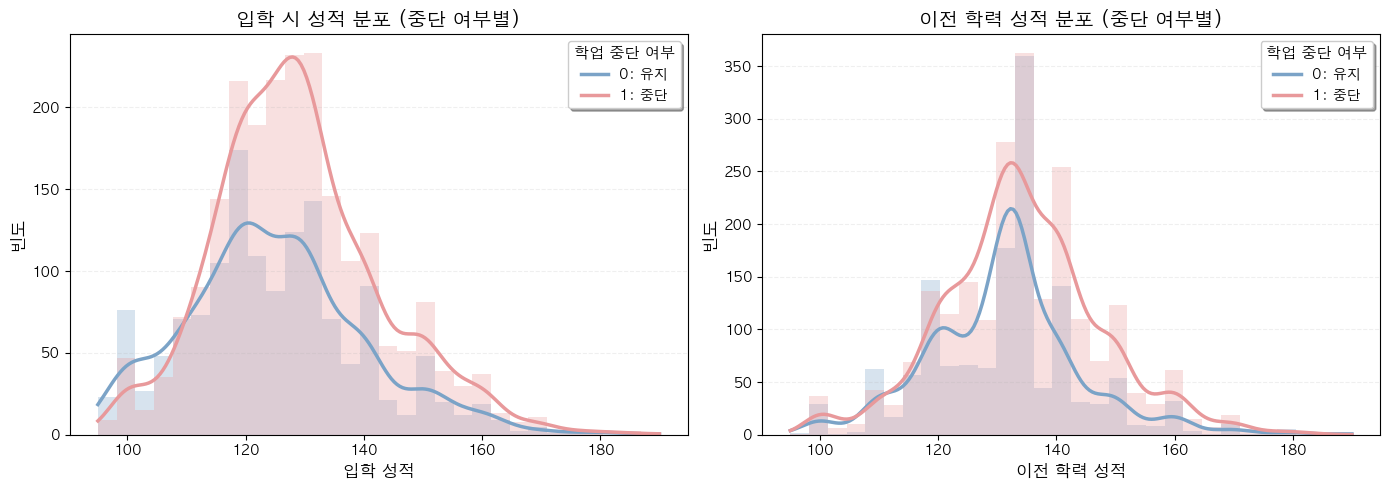

In [323]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 입학 성적 분포
sns.histplot(data=df, x='입학 성적', hue='학업 중단 여부',
             bins=30, alpha=0.3, palette=['#E8999B','#7BA3C7'], 
             edgecolor='none', kde=True, line_kws={'linewidth': 2.5}, ax=axes[0])
axes[0].set_title('입학 시 성적 분포 (중단 여부별)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('입학 성적', fontsize=12, fontweight='bold')
axes[0].set_ylabel('빈도', fontsize=12, fontweight='bold')
axes[0].legend(title='학업 중단 여부', labels=['0: 유지', '1: 중단'], 
               title_fontsize=11, fontsize=10, frameon=True, shadow=True)
axes[0].grid(axis='y', alpha=0.2, linestyle='--')

# 2. 이전 학력 성적 분포
sns.histplot(data=df, x='이전 학력 성적', hue='학업 중단 여부',
             bins=30, alpha=0.3, palette=['#E8999B','#7BA3C7'], 
             edgecolor='none', kde=True, line_kws={'linewidth': 2.5}, ax=axes[1])
axes[1].set_title('이전 학력 성적 분포 (중단 여부별)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('이전 학력 성적', fontsize=12, fontweight='bold')
axes[1].set_ylabel('빈도', fontsize=12, fontweight='bold')
axes[1].legend(title='학업 중단 여부', labels=['0: 유지', '1: 중단'], 
               title_fontsize=11, fontsize=10, frameon=True, shadow=True)
axes[1].grid(axis='y', alpha=0.2, linestyle='--')

plt.tight_layout()
plt.show()

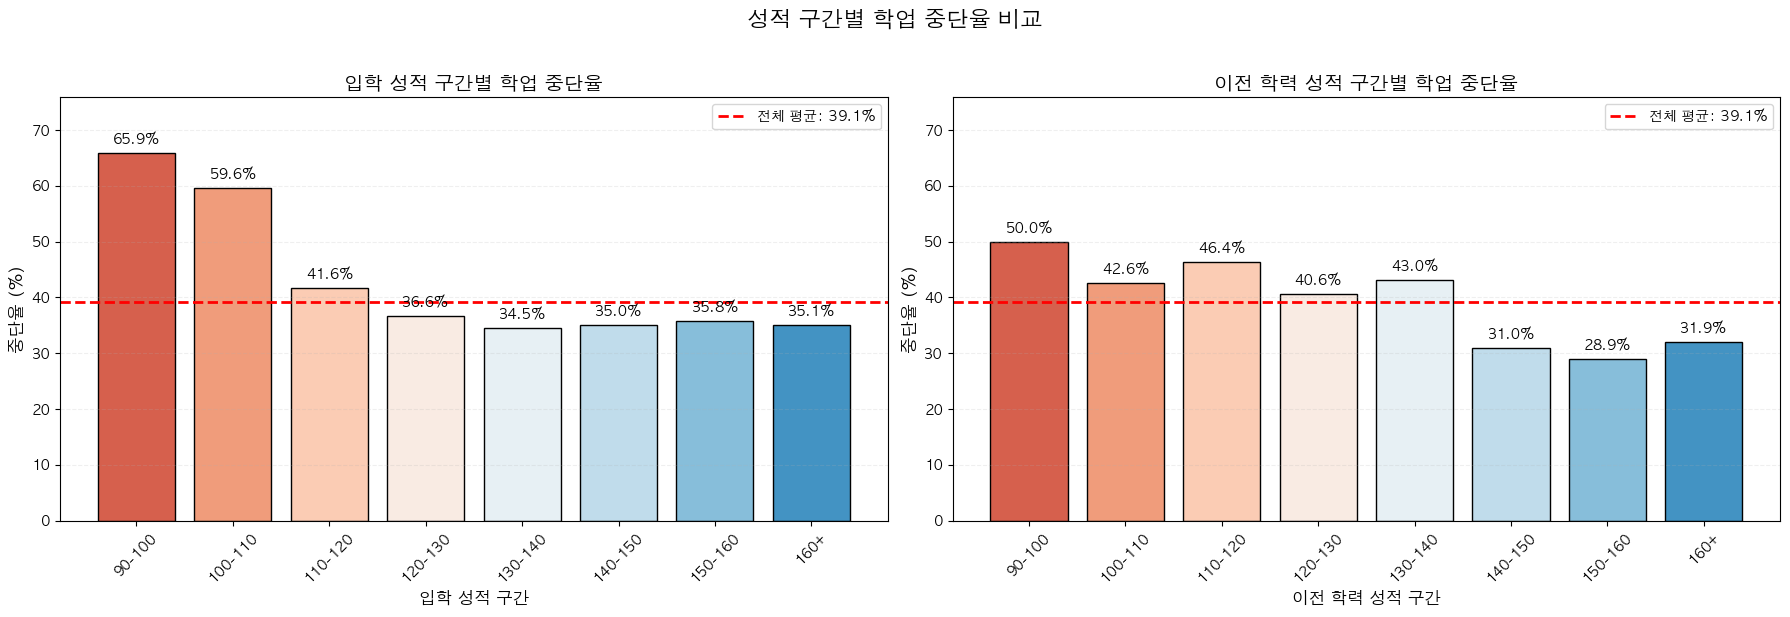

In [324]:
# 한글 폰트 설정 (macOS)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 성적 구간 설정
bins = [90, 100, 110, 120, 130, 140, 150, 160, 200]
labels = ['90-100', '100-110', '110-120', '120-130', '130-140', '140-150', '150-160', '160+']

# 입학 성적 구간 및 중단율 계산
df['입학성적구간'] = pd.cut(df['입학 성적'], bins=bins, labels=labels, right=False)
admission_dropout_rate = df.groupby('입학성적구간')['학업 중단 여부'].mean() * 100

# 이전 학력 성적 구간 및 중단율 계산
df['이전학력성적구간'] = pd.cut(df['이전 학력 성적'], bins=bins, labels=labels, right=False)
previous_dropout_rate = df.groupby('이전학력성적구간')['학업 중단 여부'].mean() * 100

# 전체 평균 중단율
overall_avg = df['학업 중단 여부'].mean() * 100

# 시각화 (1x2 서브플롯)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# === 1) 입학 성적 ===
colors1 = plt.cm.RdBu(np.linspace(0.2, 0.8, len(admission_dropout_rate)))
bars1 = axes[0].bar(admission_dropout_rate.index, admission_dropout_rate.values, 
                     color=colors1, edgecolor='black', linewidth=1)

# 막대 위에 수치 표시
for bar, rate in zip(bars1, admission_dropout_rate.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f'{rate:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

axes[0].set_xlabel('입학 성적 구간', fontsize=12, fontweight='bold')
axes[0].set_ylabel('중단율 (%)', fontsize=12, fontweight='bold')
axes[0].set_title('입학 성적 구간별 학업 중단율', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, max(admission_dropout_rate.max(), previous_dropout_rate.max()) + 10)
axes[0].axhline(y=overall_avg, color='red', linestyle='--', linewidth=2, 
                label=f'전체 평균: {overall_avg:.1f}%')
axes[0].legend(loc='upper right', fontsize=10)
axes[0].grid(axis='y', alpha=0.2, linestyle='--')
axes[0].tick_params(axis='x', rotation=45)

# === 2) 이전 학력 성적 ===
colors2 = plt.cm.RdBu(np.linspace(0.2, 0.8, len(previous_dropout_rate)))
bars2 = axes[1].bar(previous_dropout_rate.index, previous_dropout_rate.values, 
                     color=colors2, edgecolor='black', linewidth=1)

# 막대 위에 수치 표시
for bar, rate in zip(bars2, previous_dropout_rate.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f'{rate:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

axes[1].set_xlabel('이전 학력 성적 구간', fontsize=12, fontweight='bold')
axes[1].set_ylabel('중단율 (%)', fontsize=12, fontweight='bold')
axes[1].set_title('이전 학력 성적 구간별 학업 중단율', fontsize=14, fontweight='bold')
axes[1].set_ylim(0, max(admission_dropout_rate.max(), previous_dropout_rate.max()) + 10)
axes[1].axhline(y=overall_avg, color='red', linestyle='--', linewidth=2, 
                label=f'전체 평균: {overall_avg:.1f}%')
axes[1].legend(loc='upper right', fontsize=10)
axes[1].grid(axis='y', alpha=0.2, linestyle='--')
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('성적 구간별 학업 중단율 비교', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('dropout_rate_by_scores.png', dpi=150, bbox_inches='tight')
plt.show()

### 1학기/2학기 데이터를 통한 중단율 분석

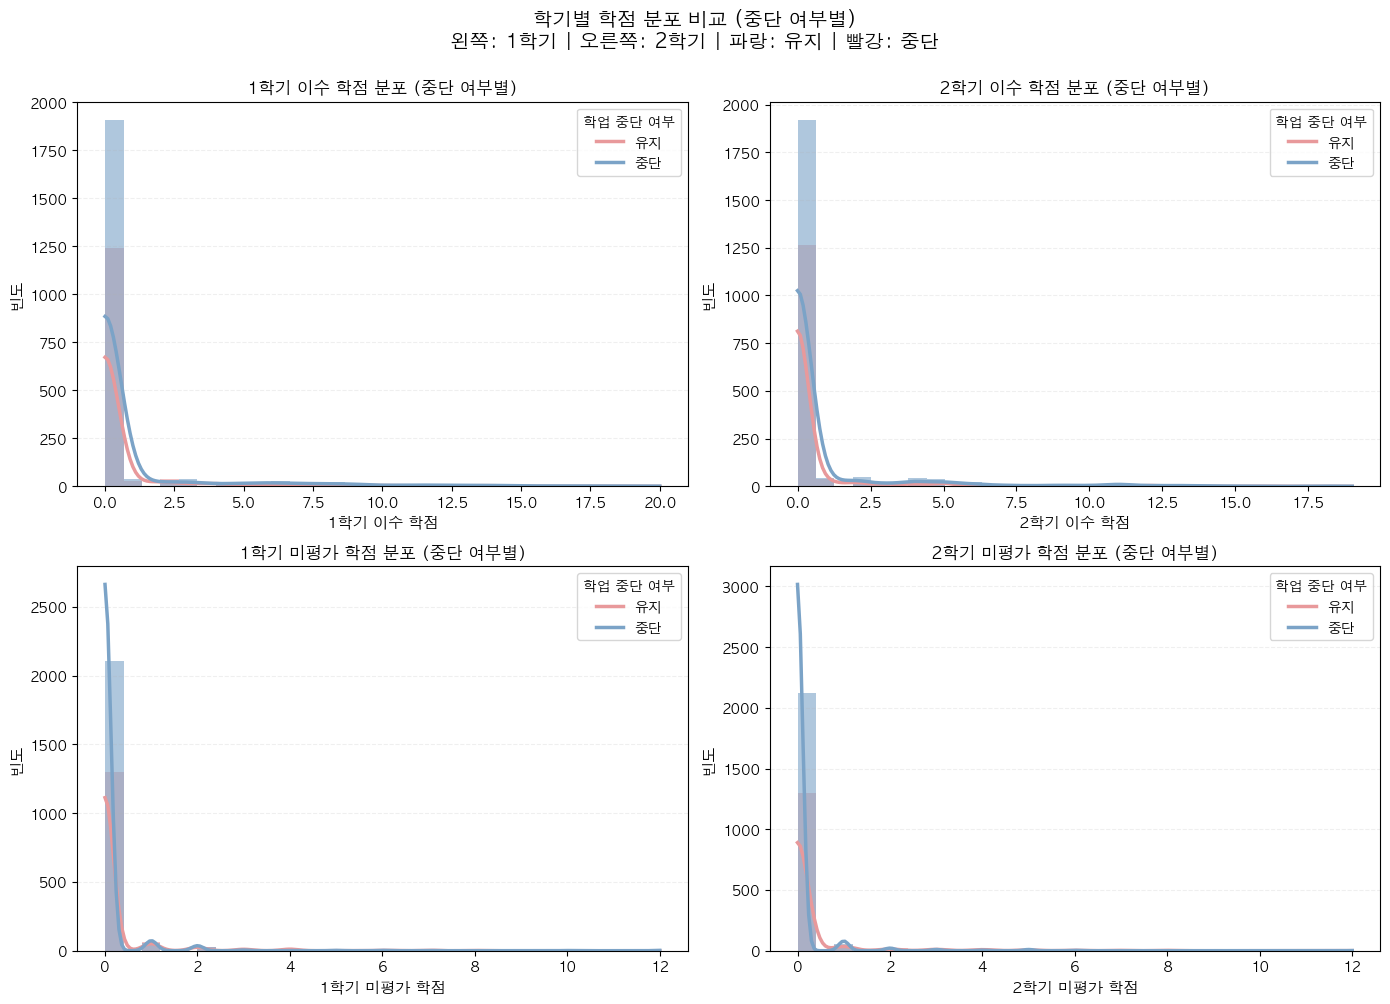

In [325]:
cols = [
    ('1학기 이수 학점', '2학기 이수 학점'),
    ('1학기 미평가 학점', '2학기 미평가 학점')
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, (col1, col2) in enumerate(cols):
    # 1학기 히스토그램
    sns.histplot(data=df, x=col1, hue='학업 중단 여부',
                 bins=30, alpha=0.6, palette=['#7BA3C7', '#E8999B'],
                 edgecolor='none', kde=True, line_kws={'linewidth': 2.5},
                 ax=axes[i, 0])
    axes[i, 0].set_title(f'{col1} 분포 (중단 여부별)', fontsize=12, fontweight='bold')
    axes[i, 0].set_xlabel(col1, fontsize=11, fontweight='bold')
    axes[i, 0].set_ylabel('빈도', fontsize=11, fontweight='bold')
    axes[i, 0].legend(title='학업 중단 여부', labels=['유지', '중단'],
                      fontsize=10, title_fontsize=10)
    axes[i, 0].grid(axis='y', alpha=0.2, linestyle='--')
    
    # 2학기 히스토그램
    sns.histplot(data=df, x=col2, hue='학업 중단 여부',
                 bins=30, alpha=0.6, palette=['#7BA3C7', '#E8999B'],
                 edgecolor='none', kde=True, line_kws={'linewidth': 2.5},
                 ax=axes[i, 1])
    axes[i, 1].set_title(f'{col2} 분포 (중단 여부별)', fontsize=12, fontweight='bold')
    axes[i, 1].set_xlabel(col2, fontsize=11, fontweight='bold')
    axes[i, 1].set_ylabel('빈도', fontsize=11, fontweight='bold')
    axes[i, 1].legend(title='학업 중단 여부', labels=['유지', '중단'],
                      fontsize=10, title_fontsize=10)
    axes[i, 1].grid(axis='y', alpha=0.2, linestyle='--')

plt.suptitle('학기별 학점 분포 비교 (중단 여부별)\n왼쪽: 1학기 | 오른쪽: 2학기 | 파랑: 유지 | 빨강: 중단', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

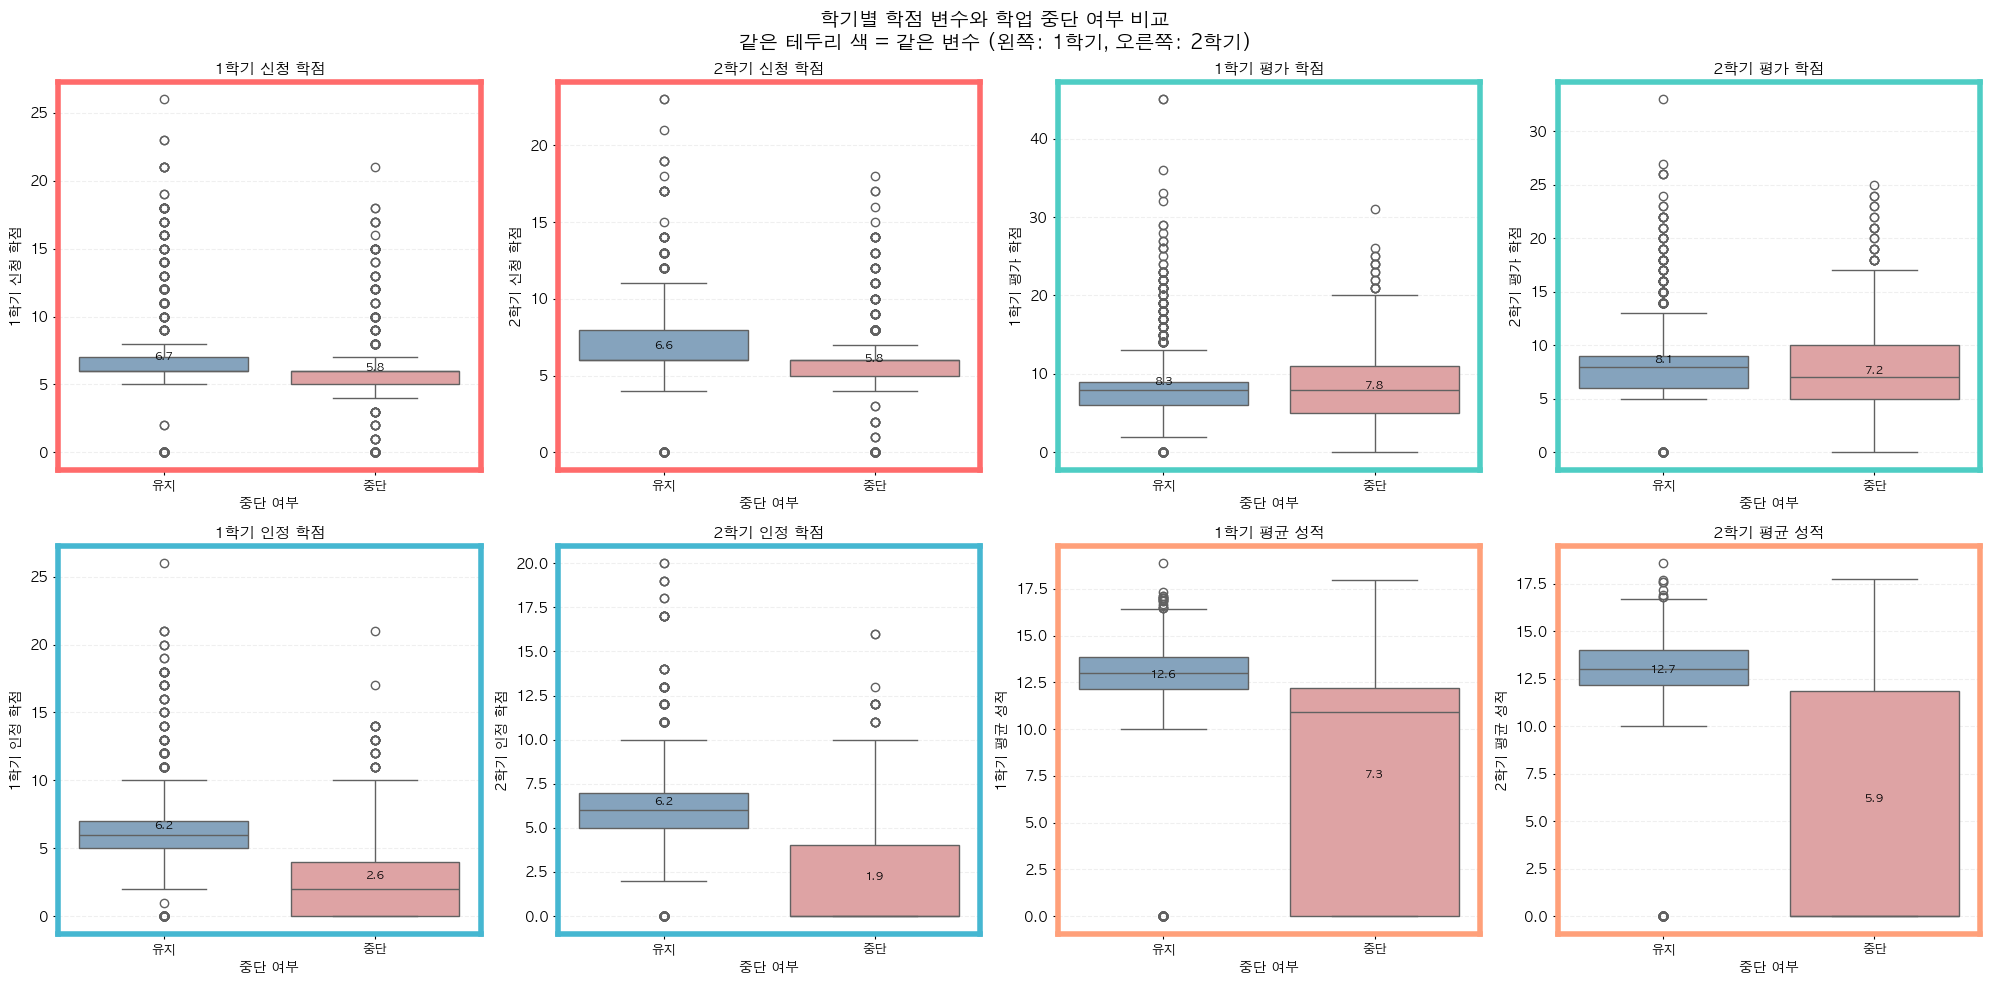

In [326]:
from matplotlib.patches import Rectangle

cols = [
    ('1학기 신청 학점', '2학기 신청 학점'),
    ('1학기 평가 학점', '2학기 평가 학점'),
    ('1학기 인정 학점', '2학기 인정 학점'),
    ('1학기 평균 성적', '2학기 평균 성적'),
]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# 테두리 색상 (변수별로 다르게)
border_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for i, (col1, col2) in enumerate(cols):
    row = i // 2
    col_offset = (i % 2) * 2
    
    # 1학기
    sns.boxplot(data=df, x='학업 중단 여부', y=col1, 
                palette=['#7BA3C7', '#E8999B'], ax=axes[row, col_offset])
    axes[row, col_offset].set_title(f'{col1}', fontsize=11, fontweight='bold')
    axes[row, col_offset].set_xlabel('중단 여부', fontsize=10)
    axes[row, col_offset].set_xticklabels(['유지', '중단'], fontsize=9)
    axes[row, col_offset].grid(axis='y', alpha=0.2, linestyle='--')
    
    # 테두리 추가
    for spine in axes[row, col_offset].spines.values():
        spine.set_edgecolor(border_colors[i])
        spine.set_linewidth(4)
    
    # 평균값 표시
    for j in [0, 1]:
        mean_val = df[df['학업 중단 여부'] == j][col1].mean()
        axes[row, col_offset].text(j, mean_val, f'{mean_val:.1f}', 
                                    ha='center', va='bottom', fontweight='bold', fontsize=8)
    
    # 2학기
    sns.boxplot(data=df, x='학업 중단 여부', y=col2, 
                palette=['#7BA3C7', '#E8999B'], ax=axes[row, col_offset + 1])
    axes[row, col_offset + 1].set_title(f'{col2}', fontsize=11, fontweight='bold')
    axes[row, col_offset + 1].set_xlabel('중단 여부', fontsize=10)
    axes[row, col_offset + 1].set_xticklabels(['유지', '중단'], fontsize=9)
    axes[row, col_offset + 1].grid(axis='y', alpha=0.2, linestyle='--')
    
    # 같은 색 테두리
    for spine in axes[row, col_offset + 1].spines.values():
        spine.set_edgecolor(border_colors[i])
        spine.set_linewidth(4)
    
    # 평균값 표시
    for j in [0, 1]:
        mean_val = df[df['학업 중단 여부'] == j][col2].mean()
        axes[row, col_offset + 1].text(j, mean_val, f'{mean_val:.1f}', 
                                        ha='center', va='bottom', fontweight='bold', fontsize=8)

plt.suptitle('학기별 학점 변수와 학업 중단 여부 비교\n같은 테두리 색 = 같은 변수 (왼쪽: 1학기, 오른쪽: 2학기)', 
             fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

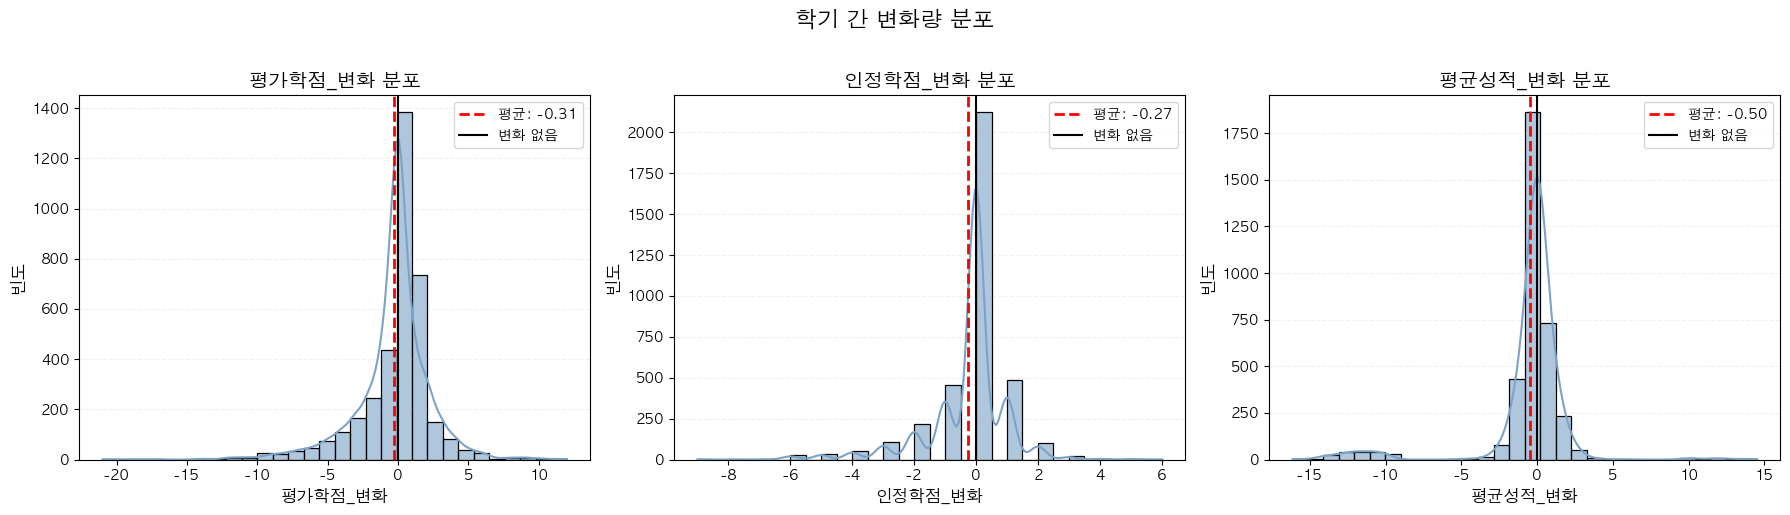

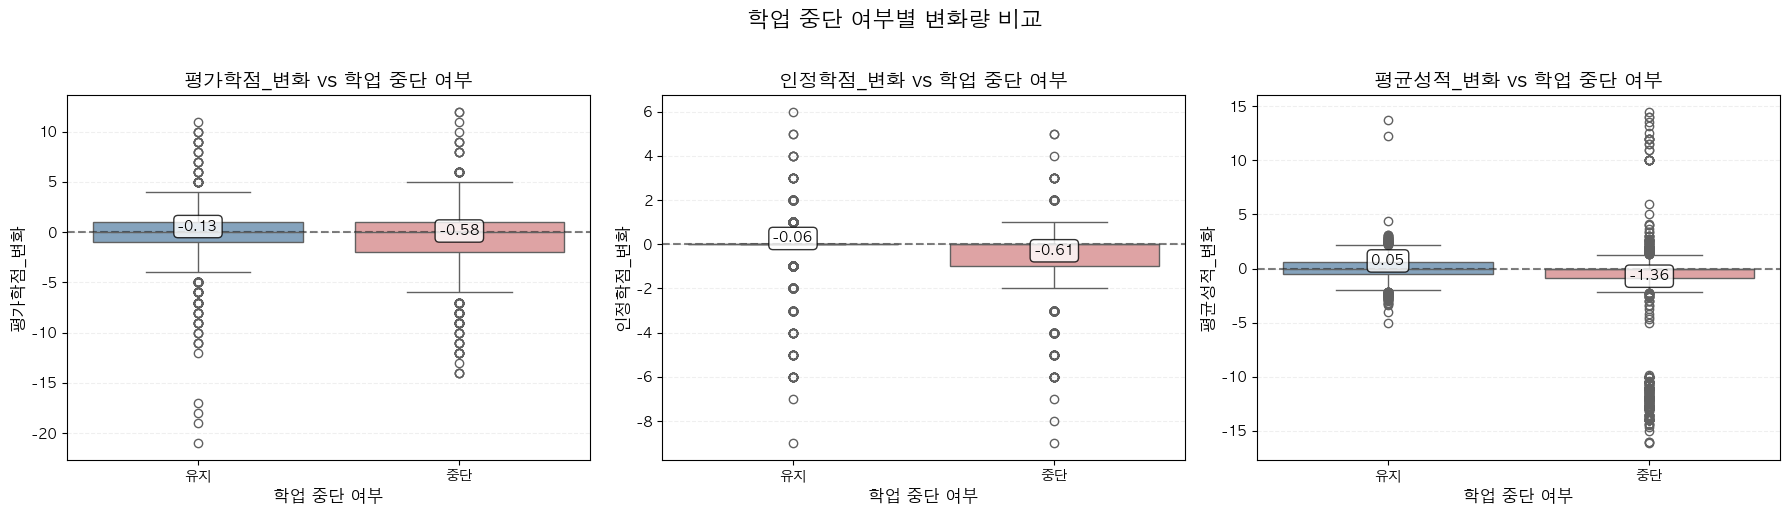

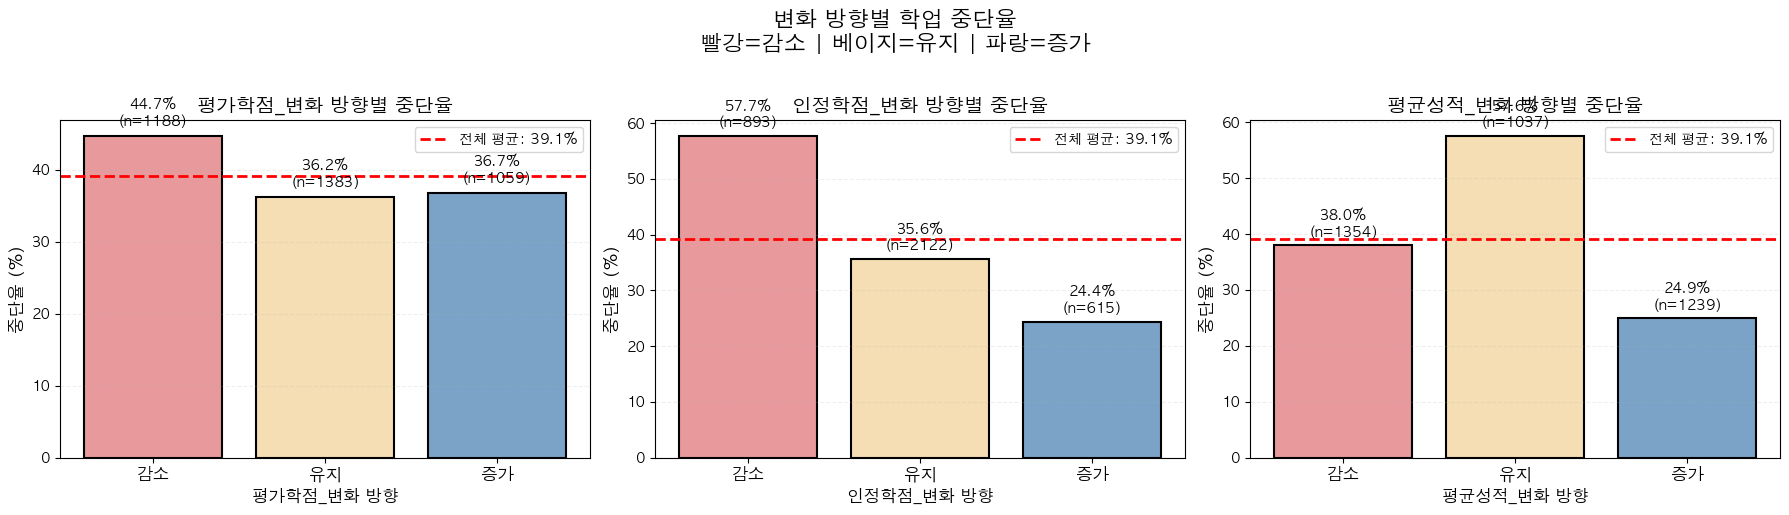

In [327]:
df_copy_diff = df.copy()

# 이제 정상적으로 계산
df_copy_diff['평가학점_변화'] = df_copy_diff['2학기 평가 학점'] - df_copy_diff['1학기 평가 학점']
df_copy_diff['인정학점_변화'] = df_copy_diff['2학기 인정 학점'] - df_copy_diff['1학기 인정 학점']
df_copy_diff['평균성적_변화'] = df_copy_diff['2학기 평균 성적'] - df_copy_diff['1학기 평균 성적']

# ========================================
# 시각화 1: 변화량 분포 (히스토그램 + KDE)
# ========================================
change_vars = ['평가학점_변화', '인정학점_변화', '평균성적_변화']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(change_vars):
    sns.histplot(data=df_copy_diff, x=var, kde=True, bins=30,
                 color='#7BA3C7', alpha=0.6, ax=axes[i])
    
    # 평균선 표시
    mean_val = df_copy_diff[var].mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2,
                    label=f'평균: {mean_val:.2f}')
    
    # 0선 표시 (변화 없음)
    axes[i].axvline(0, color='black', linestyle='-', linewidth=1.5,
                    label='변화 없음')
    
    axes[i].set_title(f'{var} 분포', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var, fontsize=12, fontweight='bold')
    axes[i].set_ylabel('빈도', fontsize=12, fontweight='bold')
    axes[i].legend()
    axes[i].grid(axis='y', alpha=0.2, linestyle='--')

plt.suptitle('학기 간 변화량 분포', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ========================================
# 시각화 2: 중단 여부별 변화량 비교 (박스플롯)
# ========================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(change_vars):
    sns.boxplot(data=df_copy_diff, x='학업 중단 여부', y=var,
                palette=['#7BA3C7', '#E8999B'], ax=axes[i])
    
    # 평균값 표시
    for j in [0, 1]:
        mean_val = df_copy_diff[df_copy_diff['학업 중단 여부'] == j][var].mean()
        axes[i].text(j, mean_val, f'{mean_val:.2f}', 
                    ha='center', va='bottom', fontweight='bold', 
                    fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 0선 표시
    axes[i].axhline(0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    
    axes[i].set_title(f'{var} vs 학업 중단 여부', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('학업 중단 여부', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(var, fontsize=12, fontweight='bold')
    axes[i].set_xticklabels(['유지', '중단'])
    axes[i].grid(axis='y', alpha=0.2, linestyle='--')

plt.suptitle('학업 중단 여부별 변화량 비교', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ========================================
# 시각화 3: 변화 방향별 중단율
# ========================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(change_vars):
    # 변화 방향 구분 (감소/유지/증가)
    df_copy_diff[f'{var}_방향'] = pd.cut(
        df_copy_diff[var], 
        bins=[-np.inf, -0.01, 0.01, np.inf],
        labels=['감소', '유지', '증가']
    )
    
    # 방향별 중단율 계산
    direction_stats = df_copy_diff.groupby(f'{var}_방향', observed=True).agg({
        '학업 중단 여부': ['mean', 'count']
    }).reset_index()
    direction_stats.columns = ['방향', '중단율', '학생 수']
    direction_stats['중단율'] = direction_stats['중단율'] * 100
    
    # 막대 그래프
    colors_map = {'감소': '#E8999B', '유지': '#F5DEB3', '증가': '#7BA3C7'}
    colors = [colors_map[d] for d in direction_stats['방향']]
    
    bars = axes[i].bar(range(len(direction_stats)), direction_stats['중단율'],
                       color=colors, edgecolor='black', linewidth=1.5)
    
    # 값 표시
    for j, (bar, rate, count) in enumerate(zip(bars, direction_stats['중단율'], direction_stats['학생 수'])):
        axes[i].text(j, rate + 1, f'{rate:.1f}%\n(n={int(count)})', 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    axes[i].set_xticks(range(len(direction_stats)))
    axes[i].set_xticklabels(direction_stats['방향'], fontsize=12)
    axes[i].set_xlabel(f'{var} 방향', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('중단율 (%)', fontsize=12, fontweight='bold')
    axes[i].set_title(f'{var} 방향별 중단율', fontsize=14, fontweight='bold')
    axes[i].grid(axis='y', alpha=0.2, linestyle='--')
    
    # 평균선
    overall_avg = df_copy_diff['학업 중단 여부'].mean() * 100
    axes[i].axhline(y=overall_avg, color='red', linestyle='--', linewidth=2,
                   label=f'전체 평균: {overall_avg:.1f}%')
    axes[i].legend()

plt.suptitle('변화 방향별 학업 중단율\n빨강=감소 | 베이지=유지 | 파랑=증가', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 사회/경제적 요인 EDA

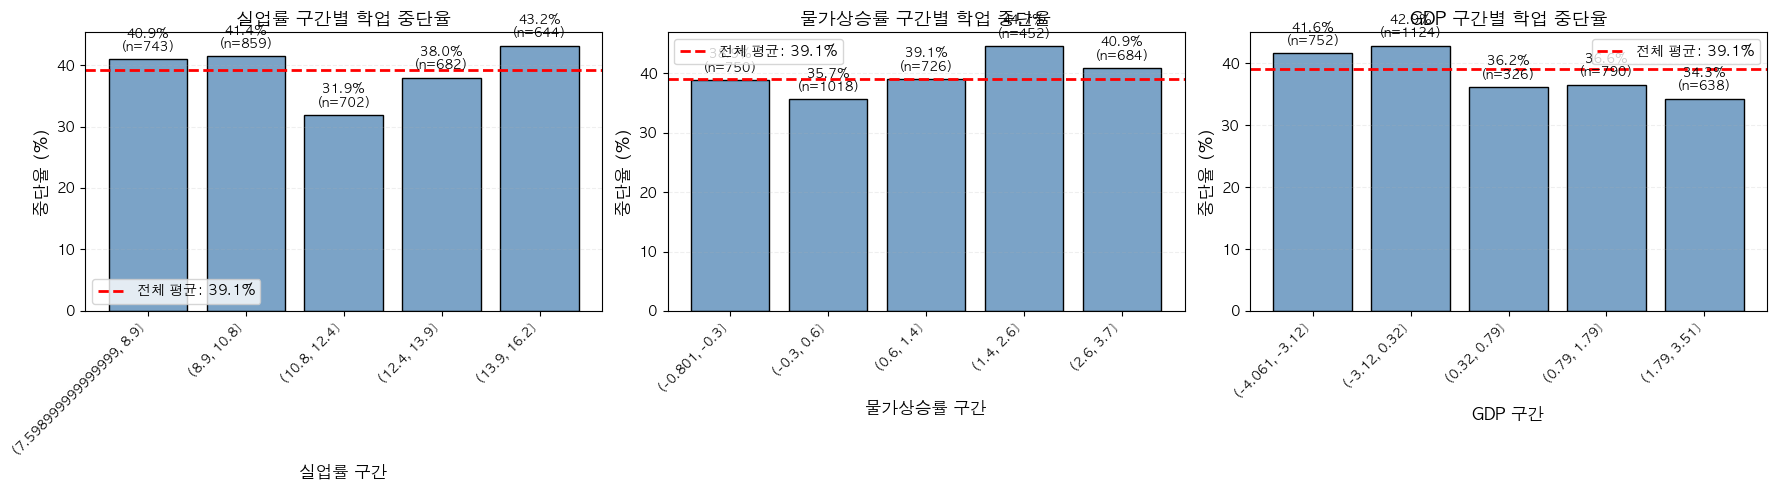

In [328]:
# 경제 변수 구간별 중단율 분석 (원본 df 보호)
economic_vars = ['실업률', '물가상승률', 'GDP']
existing_vars = [col for col in economic_vars if col in df.columns]

if len(existing_vars) > 0:
    # 원본 df 복사
    df_temp = df.copy()
    
    fig, axes = plt.subplots(1, len(existing_vars), figsize=(6*len(existing_vars), 5))
    
    if len(existing_vars) == 1:
        axes = [axes]
    
    for i, var in enumerate(existing_vars):
        # 구간 생성 (qcut으로 동일한 개수씩)
        df_temp[f'{var}_bin'] = pd.qcut(df_temp[var], q=5, duplicates='drop')
        
        # 구간별 중단율 계산
        stats = df_temp.groupby(f'{var}_bin', observed=True).agg({
            '학업 중단 여부': ['mean', 'count']
        }).reset_index()
        stats.columns = [f'{var}_bin', '중단율', '학생 수']
        stats['중단율'] = stats['중단율'] * 100
        
        # 구간을 문자열로 변환
        stats[f'{var}_bin_str'] = stats[f'{var}_bin'].astype(str)
        
        # 막대 그래프
        bars = axes[i].bar(range(len(stats)), stats['중단율'], 
                           color='#7BA3C7', edgecolor='black', linewidth=1)
        
        # 값 표시
        for j, (bar, rate, count) in enumerate(zip(bars, stats['중단율'], stats['학생 수'])):
            axes[i].text(j, rate + 1, f'{rate:.1f}%\n(n={int(count)})', 
                        ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        axes[i].set_xticks(range(len(stats)))
        axes[i].set_xticklabels(stats[f'{var}_bin_str'], rotation=45, ha='right', fontsize=9)
        axes[i].set_xlabel(f'{var} 구간', fontsize=12, fontweight='bold')
        axes[i].set_ylabel('중단율 (%)', fontsize=12, fontweight='bold')
        axes[i].set_title(f'{var} 구간별 학업 중단율', fontsize=13, fontweight='bold')
        axes[i].grid(axis='y', alpha=0.2, linestyle='--')
        
        # 평균선
        overall_avg = df['학업 중단 여부'].mean() * 100
        axes[i].axhline(y=overall_avg, color='red', linestyle='--', linewidth=2,
                       label=f'전체 평균: {overall_avg:.1f}%')
        axes[i].legend()
    
    plt.tight_layout()
    plt.show()
    
    # 메모리 정리
    del df_temp

In [329]:
# 거시경제 고유 조합 확인
macro_combos = df[['실업률', '물가상승률', 'GDP']].drop_duplicates().sort_values('실업률')
print(f"거시경제 고유 조합 수: {len(macro_combos)}")
print(macro_combos)

# 각 조합별 학생 수
print("\n조합별 학생 수:")
combo_counts = df.groupby(['실업률', '물가상승률', 'GDP']).size().reset_index(name='학생수')
print(combo_counts.sort_values('실업률'))

거시경제 고유 조합 수: 10
     실업률  물가상승률   GDP
36   7.6    2.6  0.32
9    8.9    1.4  3.51
3    9.4   -0.8 -3.12
0   10.8    1.4  1.74
20  11.1    0.6  2.02
33  12.4    0.5  1.79
11  12.7    3.7 -1.70
1   13.9   -0.3  0.79
6   15.5    2.8 -4.06
5   16.2    0.3 -0.92

조합별 학생 수:
    실업률  물가상승률   GDP  학생수
0   7.6    2.6  0.32  452
1   8.9    1.4  3.51  291
2   9.4   -0.8 -3.12  424
3  10.8    1.4  1.74  435
4  11.1    0.6  2.02  347
5  12.4    0.5  1.79  355
6  12.7    3.7 -1.70  356
7  13.9   -0.3  0.79  326
8  15.5    2.8 -4.06  328
9  16.2    0.3 -0.92  316


# 4. 히트맵

In [330]:
# 수치형 컬럼 분류
binary_cols = []
continuous_cols = []

numeric_columns = df.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()

for col in numeric_columns:
    unique_count = df[col].nunique()
    
    # nunique()가 Series를 반환하는 경우 대비
    if isinstance(unique_count, pd.Series):
        unique_count = unique_count.iloc[0]
    
    if unique_count <= 2:
        binary_cols.append(col)
    else:
        continuous_cols.append(col)

print("분류 완료!")
print(f"이진 변수: {binary_cols}")
print(f"연속 변수: {continuous_cols}")

분류 완료!
이진 변수: ['주간/야간 구분', '이주 여부', '특수 교육 필요 여부', '채무 여부', '등록금 납부 최신 여부', '성별', '장학금 수혜 여부', '유학생 여부', '학업 중단 여부']
연속 변수: ['혼인 상태', '지원 방식', '지원 순위', '전공 과정', '최종 학력', '이전 학력 성적', '국적', '입학 성적', '입학 시 나이', '1학기 이수 학점', '1학기 신청 학점', '1학기 평가 학점', '1학기 인정 학점', '1학기 평균 성적', '1학기 미평가 학점', '2학기 이수 학점', '2학기 신청 학점', '2학기 평가 학점', '2학기 인정 학점', '2학기 평균 성적', '2학기 미평가 학점', '실업률', '물가상승률', 'GDP', '아버지 학력 레벨', '어머니 학력 레벨']


## 3.1 연속형 변수 + target의 상관계수 확인

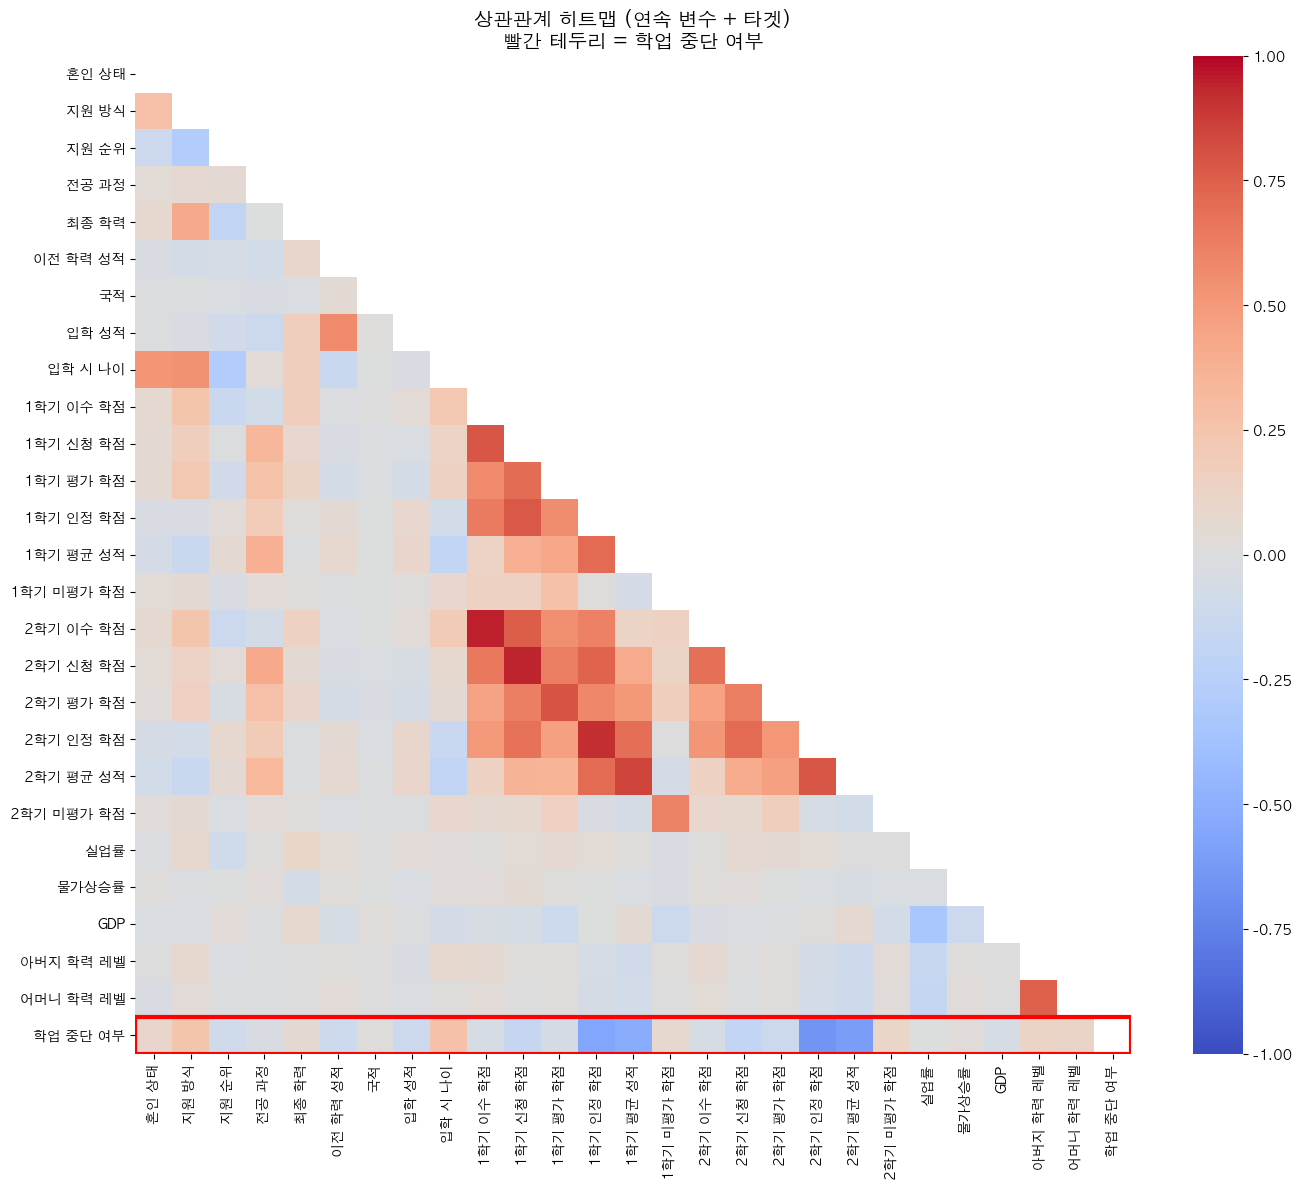

In [331]:
df_cont = df[continuous_cols]
df_cont_plus_bin = pd.concat([df[continuous_cols], df[["학업 중단 여부"]]], axis=1)

corr = df_cont_plus_bin.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# 플롯 생성
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr, mask=mask, annot=False, cmap="coolwarm", vmin=-1, vmax=1, ax=ax)

# "학업 중단 여부"의 인덱스 찾기
target_idx = corr.columns.get_loc("학업 중단 여부")

# 네모칸 (테두리) 그리기
from matplotlib.patches import Rectangle

# 가로줄 (행) 강조 - 삼각형 마스크 때문에 보이는 부분만
rect_row = Rectangle((0, target_idx), target_idx + 1, 1, 
                      linewidth=3, edgecolor='red', facecolor='none')
ax.add_patch(rect_row)

plt.title("상관관계 히트맵 (연속 변수 + 타겟)\n빨간 테두리 = 학업 중단 여부", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

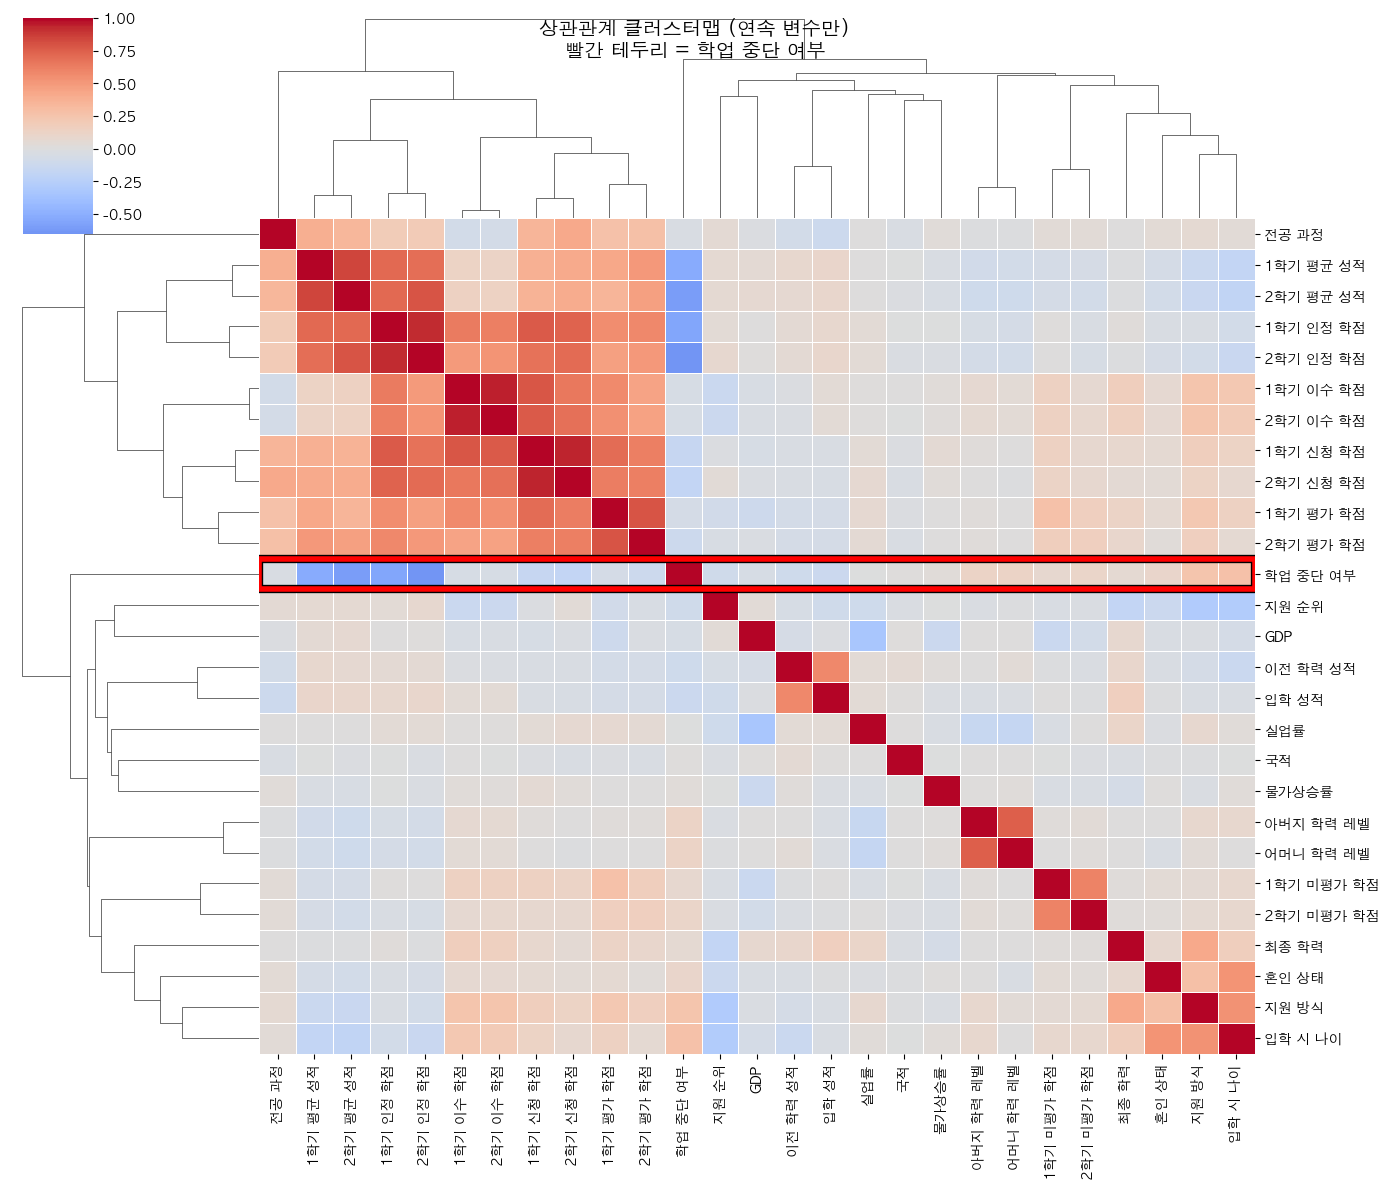


분석된 변수: 27개
  - 연속 변수: 26개
  - 타겟 변수: 1개 (학업 중단 여부)


In [332]:
from matplotlib.patches import Rectangle

# continuous_cols + 학업 중단 여부만 선택
selected_cols = continuous_cols + ['학업 중단 여부']
corr_continuous = df[selected_cols].corr()

# 클러스터맵 생성
g = sns.clustermap(
    corr_continuous,
    cmap="coolwarm",
    center=0,
    figsize=(14, 12),
    linewidths=0.5
)

# 재정렬된 위치 찾기
reordered_cols = corr_continuous.columns[g.dendrogram_col.reordered_ind]
reordered_rows = corr_continuous.index[g.dendrogram_row.reordered_ind]

if "학업 중단 여부" in reordered_cols:
    col_idx = list(reordered_cols).index("학업 중단 여부")
    row_idx = list(reordered_rows).index("학업 중단 여부")
    
    ax = g.ax_heatmap
    
    # 이중 테두리 (검정 + 빨강)
    for lw, color in [(6, 'black'), (4, 'red')]:
        # 가로줄
        rect_row = Rectangle((0, row_idx), len(corr_continuous), 1, 
                              linewidth=lw, edgecolor=color, facecolor='none')
        ax.add_patch(rect_row)

g.fig.suptitle("상관관계 클러스터맵 (연속 변수만)\n빨간 테두리 = 학업 중단 여부", 
               y=0.98, fontsize=14, fontweight='bold')
plt.show()

print(f"\n분석된 변수: {len(selected_cols)}개")
print(f"  - 연속 변수: {len(continuous_cols)}개")
print(f"  - 타겟 변수: 1개 (학업 중단 여부)")

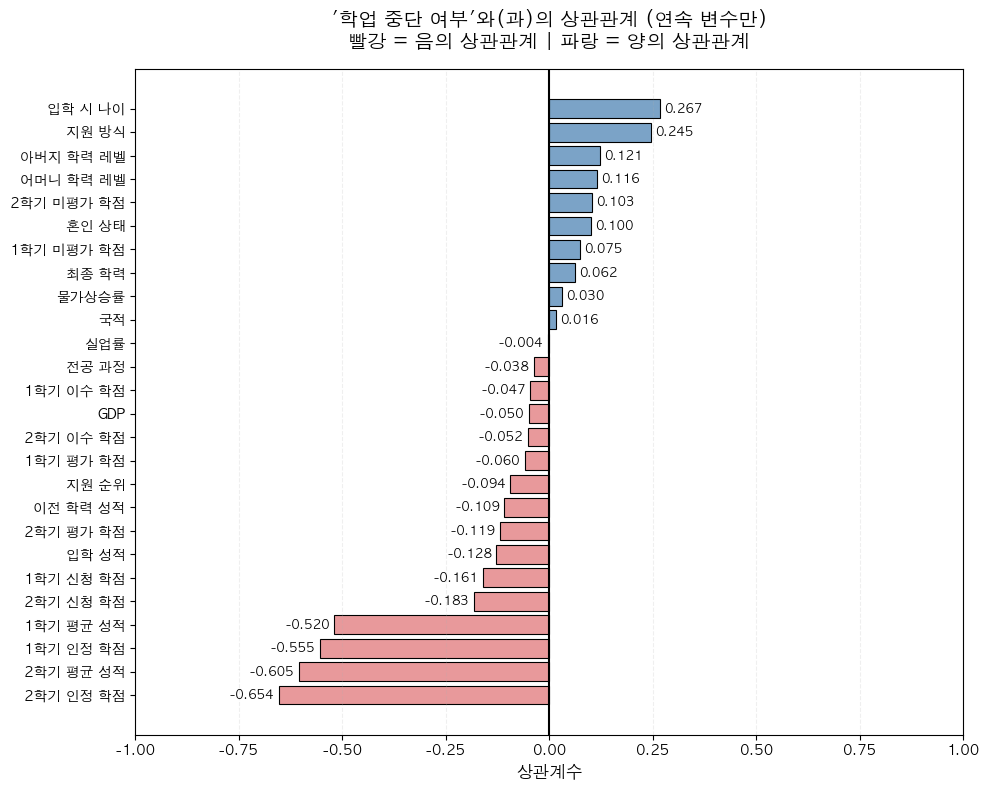


분석된 변수 개수: 26개 (연속 변수만)


In [333]:
import matplotlib.pyplot as plt

def plot_correlation(df, target_col, cols_to_use=None, top_n=15):
    """
    특정 컬럼과의 상관관계를 막대 그래프로 시각화
    
    Parameters:
    - df: DataFrame
    - target_col: 타겟 컬럼명
    - cols_to_use: 분석할 컬럼 리스트 (None이면 모든 수치형 컬럼)
    - top_n: 상위/하위 몇 개씩 보여줄지
    """
    # cols_to_use가 주어지면 그것만 사용, 아니면 모든 수치형 컬럼
    if cols_to_use is not None:
        # target_col이 리스트에 없으면 추가
        if target_col not in cols_to_use:
            cols_to_use = cols_to_use + [target_col]
        numeric_df = df[cols_to_use]
    else:
        numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])
    
    # 상관관계 계산
    corr = numeric_df.corr()[target_col].sort_values(ascending=False)
    
    # 자기 자신 제외
    corr = corr[corr.index != target_col]
    
    # 상위/하위 각각 top_n개 추출
    top_positive = corr.head(top_n)
    top_negative = corr.tail(top_n)
    
    # 합치기
    top_corr = pd.concat([top_positive, top_negative]).drop_duplicates()
    top_corr = top_corr.sort_values()
    
    # 시각화
    fig, ax = plt.subplots(figsize=(10, max(8, len(top_corr) * 0.3)))
    
    colors = ['#E8999B' if x < 0 else '#7BA3C7' for x in top_corr.values]
    bars = ax.barh(range(len(top_corr)), top_corr.values, color=colors, 
                   edgecolor='black', linewidth=0.8)
    
    # 값 표시
    for i, (bar, val) in enumerate(zip(bars, top_corr.values)):
        x_pos = val + (0.01 if val > 0 else -0.01)
        ha = 'left' if val > 0 else 'right'
        ax.text(x_pos, i, f'{val:.3f}', va='center', ha=ha, 
                fontsize=9, fontweight='bold')
    
    ax.set_yticks(range(len(top_corr)))
    ax.set_yticklabels(top_corr.index, fontsize=10)
    ax.set_xlabel('상관계수', fontsize=12, fontweight='bold')
    
    # 제목에 범위 표시
    scope = "연속 변수만" if cols_to_use is not None else "전체 수치형 변수"
    ax.set_title(f"'{target_col}'와(과)의 상관관계 ({scope})\n빨강 = 음의 상관관계 | 파랑 = 양의 상관관계", 
                 fontsize=14, fontweight='bold', pad=15)
    ax.axvline(x=0, color='black', linewidth=1.5, linestyle='-')
    ax.grid(axis='x', alpha=0.2, linestyle='--')
    ax.set_xlim(-1, 1)
    
    plt.tight_layout()
    plt.show()
    
    return top_corr

# continuous_cols만 사용
result = plot_correlation(df, '학업 중단 여부', cols_to_use=continuous_cols, top_n=15)

print(f"\n분석된 변수 개수: {len(result)}개 (연속 변수만)")

In [334]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion)[0]
    n = confusion.sum().sum()
    phi2 = chi2 / n
    r, k = confusion.shape
    return np.sqrt(phi2 / min(r-1, k-1))

target = "학업 중단 여부"

categorical_cols = [col for col in df.columns if col not in continuous_cols + [target]]

results = []

for col in categorical_cols:
    v = cramers_v(df[col], df[target])
    results.append((col, v))

cramers_df = pd.DataFrame(results, columns=["Variable", "CramersV"])
cramers_df = cramers_df.sort_values("CramersV", ascending=False).reset_index(drop=True)
cramers_df

,Variable,CramersV
0,등록금 납부 최신 여부,0.441309
1,장학금 수혜 여부,0.312380
2,채무 여부,0.266318
3,성별,0.251361
4,어머니 직업,0.178239
5,아버지 직업,0.164108
6,어머니 학력,0.152675
7,입학성적구간,0.147942
8,아버지 학력,0.140662
9,이주 여부,0.125546


범주형 변수 개수: 16
['주간/야간 구분', '어머니 학력', '아버지 학력', '어머니 직업', '아버지 직업', '이주 여부', '특수 교육 필요 여부', '채무 여부', '등록금 납부 최신 여부', '성별', '장학금 수혜 여부', '유학생 여부', '학업 중단 여부', '미혼 여부', '입학성적구간', '이전학력성적구간']


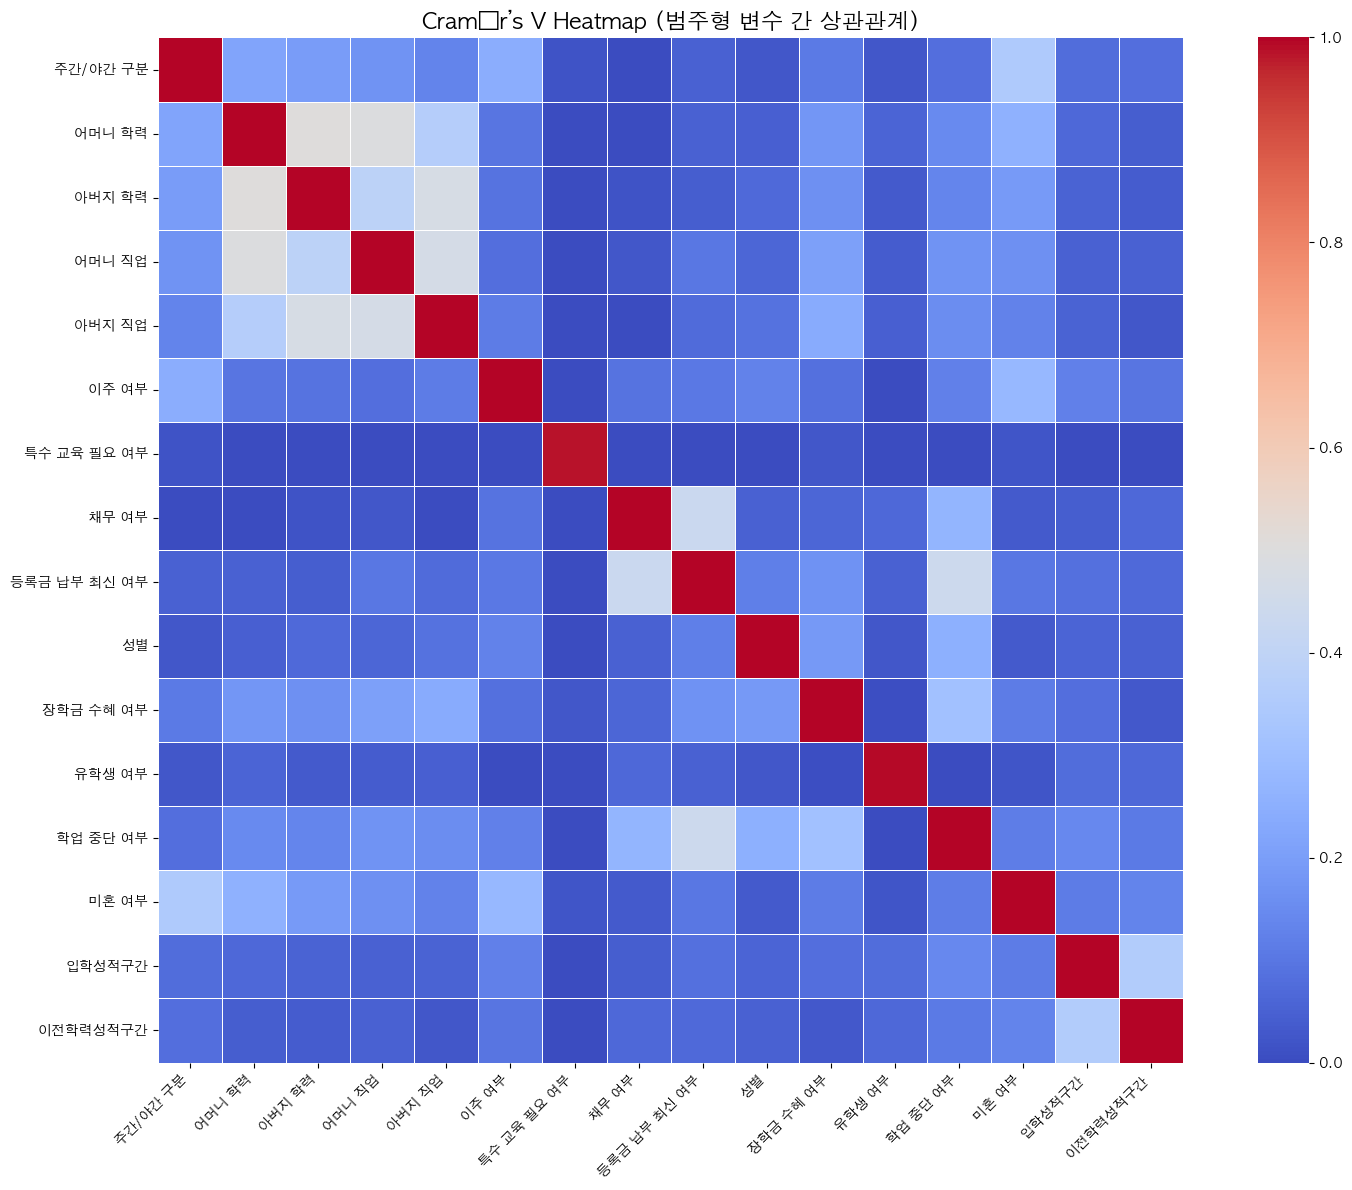

In [335]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# -------------------------------------------------------
# 1) Cramér’s V 계산 함수
# -------------------------------------------------------
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
    r_corr = r - (r-1)**2/(n-1)
    k_corr = k - (k-1)**2/(n-1)
    return np.sqrt(phi2_corr / min((k_corr - 1), (r_corr - 1)))

# -------------------------------------------------------
# 2) 전체 범주형 변수 자동 추출
# continuous_cols 는 연속형 변수 리스트
# -------------------------------------------------------
categorical_cols = [col for col in df.columns if col not in continuous_cols]

print("범주형 변수 개수:", len(categorical_cols))
print(categorical_cols)

# -------------------------------------------------------
# 3) Cramér’s V 상관행렬 생성
# -------------------------------------------------------
cramer_matrix = pd.DataFrame(
    np.zeros((len(categorical_cols), len(categorical_cols))), 
    index=categorical_cols, 
    columns=categorical_cols
)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramer_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# -------------------------------------------------------
# 4) Heatmap 시각화
# -------------------------------------------------------
plt.figure(figsize=(16, 12))
sns.heatmap(
    cramer_matrix, 
    annot=False, 
    cmap="coolwarm", 
    linewidths=0.5, 
    square=True,
    vmin=0, vmax=1
)
plt.title("Cramér’s V Heatmap (범주형 변수 간 상관관계)", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3.2 다중공선성 문제 확인 및 변수 축소

In [336]:
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 내림차순 정렬
vif = vif.sort_values(by="VIF", ascending=False).reset_index(drop=True)

vif

,feature,VIF
0,1학기 신청 학점,180.786848
1,2학기 신청 학점,155.748991
2,이전 학력 성적,129.826257
3,입학 성적,116.617629
4,1학기 인정 학점,43.326296
5,전공 과정,41.129647
6,2학기 인정 학점,33.976309
7,1학기 평균 성적,30.264046
8,2학기 평균 성적,28.033783
9,실업률,23.256265


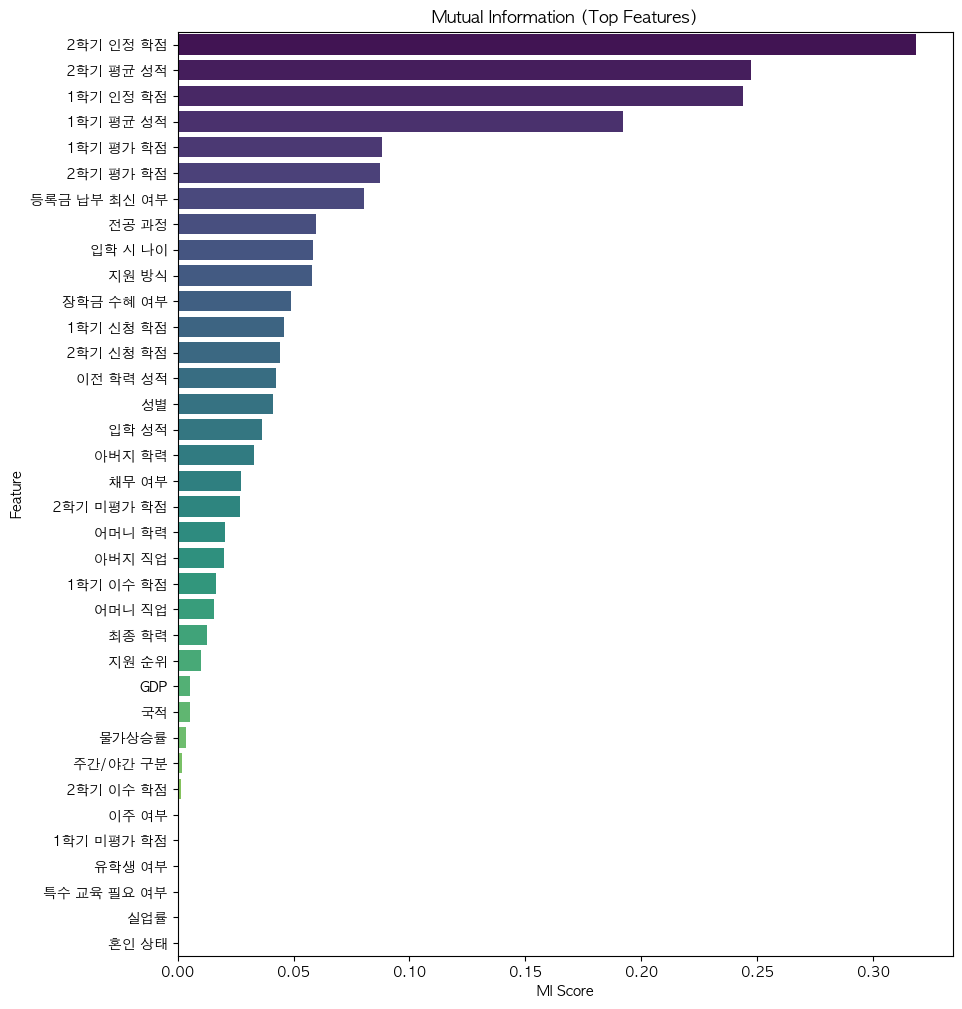

In [337]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y, discrete_features='auto')

mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x=mi_series.values, y=mi_series.index, palette="viridis")
plt.title("Mutual Information (Top Features)")
plt.xlabel("MI Score")
plt.ylabel("Feature")
plt.show()

## 3.3 1학기 평균 성적과 2학기 평균 성적의 차이

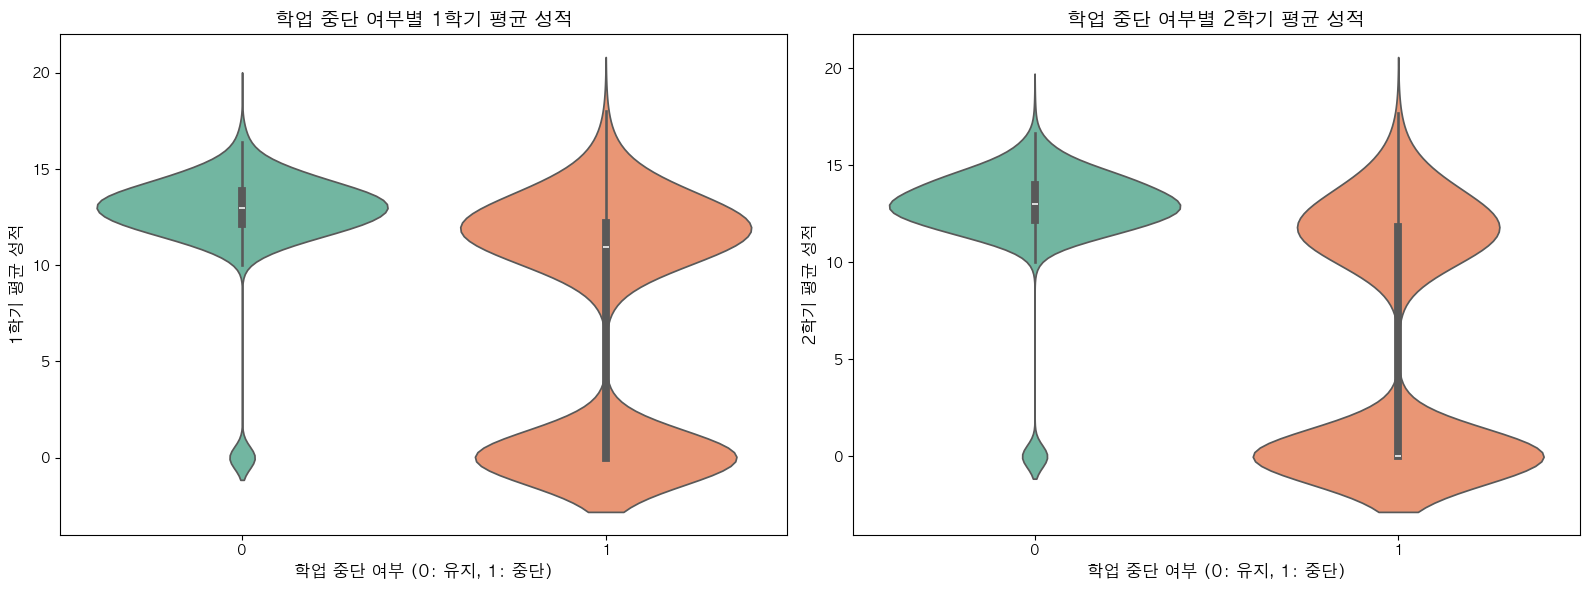

In [338]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1학기 평균 성적
sns.violinplot(
    ax=axes[0], 
    data=df, 
    x="학업 중단 여부", 
    y="1학기 평균 성적", 
    palette="Set2"
)
axes[0].set_title("학업 중단 여부별 1학기 평균 성적", fontsize=14, fontweight='bold')
axes[0].set_xlabel("학업 중단 여부 (0: 유지, 1: 중단)", fontsize=12)
axes[0].set_ylabel("1학기 평균 성적", fontsize=12)

# 2학기 평균 성적
sns.violinplot(
    ax=axes[1], 
    data=df, 
    x="학업 중단 여부", 
    y="2학기 평균 성적", 
    palette="Set2"
)
axes[1].set_title("학업 중단 여부별 2학기 평균 성적", fontsize=14, fontweight='bold')
axes[1].set_xlabel("학업 중단 여부 (0: 유지, 1: 중단)", fontsize=12)
axes[1].set_ylabel("2학기 평균 성적", fontsize=12)

plt.tight_layout()
plt.show()

## PCA (진행 보류)

In [339]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# # PCA 대상 컬럼
# pca_features = [
#     "1학기 평균 성적", "2학기 평균 성적",
#     "1학기 이수 학점", "2학기 이수 학점",
#     "1학기 평가 과목 수", "2학기 평가 과목 수",
#     "1학기 합격 과목 수", "2학기 합격 과목 수",
#     "1학기 신청 학점", "2학기 신청 학점"
# ]

# # 1. 데이터 추출
# X_pca = df_encoded[pca_features]

# # 2. 표준화
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_pca)

# # 3. PCA (2개 성분)
# pca = PCA(n_components=2)
# X_pca_transformed = pca.fit_transform(X_scaled)

# # 4. 새로운 Feature로 저장
# df_encoded["학업_성취_PC1"] = X_pca_transformed[:, 0]
# df_encoded["학업_성취_PC2"] = X_pca_transformed[:, 1]

# # 5. 기존 변수 제거(선택)
# df_final = df_encoded.drop(columns=pca_features)

# # 6. 설명력 확인
# print("Explained variance ratio:", pca.explained_variance_ratio_)
# print("Total explained variance:", pca.explained_variance_ratio_.sum())